# LA POULE QUI CHANTE - Clusterings et visualisations

# Introduction

In [1]:
## Importation des modules & librairies

import numpy as np # Calculs numériques et opérations mathématiques
from numpy import median # Calculs de médianes
import pandas as pd # Manipulation et analyse de données

import matplotlib.pyplot as plt # Création de graphiques et visualisations
import plotly.express as px # Visualisation interactive des données
import plotly.graph_objects as go # Visualisation interactive avancée
import seaborn as sns # Visualisations statistiques avancées
import folium # Visualisation de données géographiques
from mpl_toolkits.mplot3d import Axes3D # Fonction 3D

from sklearn import decomposition, preprocessing # Traitement des données
from sklearn.decomposition import PCA # Analyse en composantes principales
from sklearn.preprocessing import StandardScaler # Standardisation des données
from sklearn.cluster import KMeans # Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # Clustering hiérarchique
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer # Évaluation des clusters

import warnings # Gestion des avertissements
warnings.simplefilter(action='ignore', category=FutureWarning)  # Gestion des avertissements

sns.set() # Activation de Seaborn
import os # Importation de OS

In [2]:
## Mise en place des fonctions
def explore_dataframe(data_to_analyse):
    """
    Effectue une analyse exploratoire basique sur un dataframe donné.

    Parameters:
    data_to_analyse (DataFrame): Le dataframe à analyser.
    """
    # Dimensions du dataframe
    print('*' * 40 + " DIMENSIONS " + '*' * 44)
    print(f"Le dataframe comporte {data_to_analyse.shape[1]} variable(s) pour {data_to_analyse.shape[0]} observation(s).")

    # Typologies des variables
    print('*' * 40 + " TYPOLOGIES " + '*' * 44)
    for col, dtype in data_to_analyse.dtypes.items():
        print(f"{col} : {dtype}")

    # Effectifs des variables
    print('*' * 40 + " EFFECTIFS " + '*' * 45)
    for col, count in data_to_analyse.describe(include='all').loc['count'].items():
        print(f"{col} : {count}")

    # Valeurs nulles dans le dataframe
    print('*' * 40 + " VALEURS NULLES " + '*' * 40)
    for col, count in data_to_analyse.isnull().sum().items():
        print(f"{col} : {count}")

    # Duplicats dans le dataframe
    print('*' * 40 + " DUPLICATS " + '*' * 45)
    for col, count in data_to_analyse[data_to_analyse.duplicated()].count().items():
        print(f"{col} : {count}")


In [3]:
## Importation des données initiales
data = pd.read_csv('Clean_Data.csv', index_col=0)

# Pré-traitement des données



In [4]:
## Analyse exploratoire
explore_dataframe(data)

**************************************** DIMENSIONS ********************************************
Le dataframe comporte 9 variable(s) pour 151 observation(s).
**************************************** TYPOLOGIES ********************************************
Zone : object
Disponibilité alimentaire en quantité (kg/personne/an) : float64
Disponibilité de protéines en quantité (g/personne/jour) : float64
Disponibilité intérieure : float64
Exportations - Quantité : float64
Importations - Quantité : float64
PIB par habitant : float64
Stabilité politique : float64
Population : float64
**************************************** EFFECTIFS *********************************************
Zone : 151
Disponibilité alimentaire en quantité (kg/personne/an) : 151.0
Disponibilité de protéines en quantité (g/personne/jour) : 151.0
Disponibilité intérieure : 151.0
Exportations - Quantité : 151.0
Importations - Quantité : 151.0
PIB par habitant : 151.0
Stabilité politique : 151.0
Population : 151.0
*************

Suite au pré-traitement des données, il a été décidé d'écarter les pays considérés comme des outliers, à savoir :

- La Chine
- Les USA
- Le Brésil
- L'Inde

En sachant que la Chine Continentale a déjà été retiré du dataframe original, car contenant des informations manquantes.

In [5]:
## Préparation des données

# Création d'un dataframe contenant les pays considérés comme outliers
data_outlier = data.loc[(data['Zone'] == 'États-Unis d\'Amérique') | (data['Zone'] == 'Inde') | (data['Zone'] == 'Brésil'), :]

# Suppression des outliers du dataframe original
data.drop(data[(data["Zone"] == "États-Unis d'Amérique")].index, inplace=True)
data.drop(data[(data["Zone"] == "Inde")].index, inplace=True)
data.drop(data[(data["Zone"] == "Brésil")].index, inplace=True)

# Re-indexation du dataframe après suppression des outliers
data.set_index('Zone', inplace=True)

# Copie du dataframe original
data_copy = data.copy()

In [6]:
## Normalisation des données
# Préparation préalable des données avant analyse ( ACP, Kmeans, etc.. )

# Séparation des données
X = data.values # Données
names = data.index # Nom des observations
features = data.columns # Nom des variables

# Centrage et réduction des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aperçu des données standardisées
# X_scaled

# Vérifications des moyennes ( - > 0 ) et des écarts-types ( -> 1 )
# index = ["mean","std"]
# pd.DataFrame(X_scaled).describe().round(2).loc[index,:]

# Création d'un datafeame contenant les données standardisées
data_std = pd.DataFrame(X_scaled, columns=data.columns)

In [7]:
## Exemple de normalisation de données

# Création d'un graphique du rapport entre les exportations et la stabilité politique, avant normalisation des données
# plt.figure(figsize=(8, 3))
# sns.scatterplot(data=data, x='Exportations - Quantité', y='Stabilité politique', s=100, alpha=.5)

# Ajout du titre et gestion des legendes
# plt.title("Rapport entre les exportations et la stabilité politique, avant normalisation des données")
# plt.ticklabel_format(style='plain', axis='x')

# Affichage
# plt.savefig("exemple1.png")
# plt.show()

# Création d'un graphique du rapport entre les exportations et la stabilité politique, avant normalisation des données
#plt.figure(figsize=(8, 3))
#sns.scatterplot(data=data_std, x='Exportations - Quantité', y='Stabilité politique', s=100, alpha=.5)# Ajout du titre et gestion des legendes

# Ajout du titre et gestion des legendes
# plt.title("Rapport entre les exportations et la stabilité politique, après normalisation des données")
# plt.ticklabel_format(style='plain', axis='x')

# Affichage
# plt.savefig("exemple2.png")
# plt.show()

# print("On remarque que les données sont identiques, mais l'échelle a quant à elle fortement diminuée.")

# Clusterings

## Classification ascendante hiérarchique

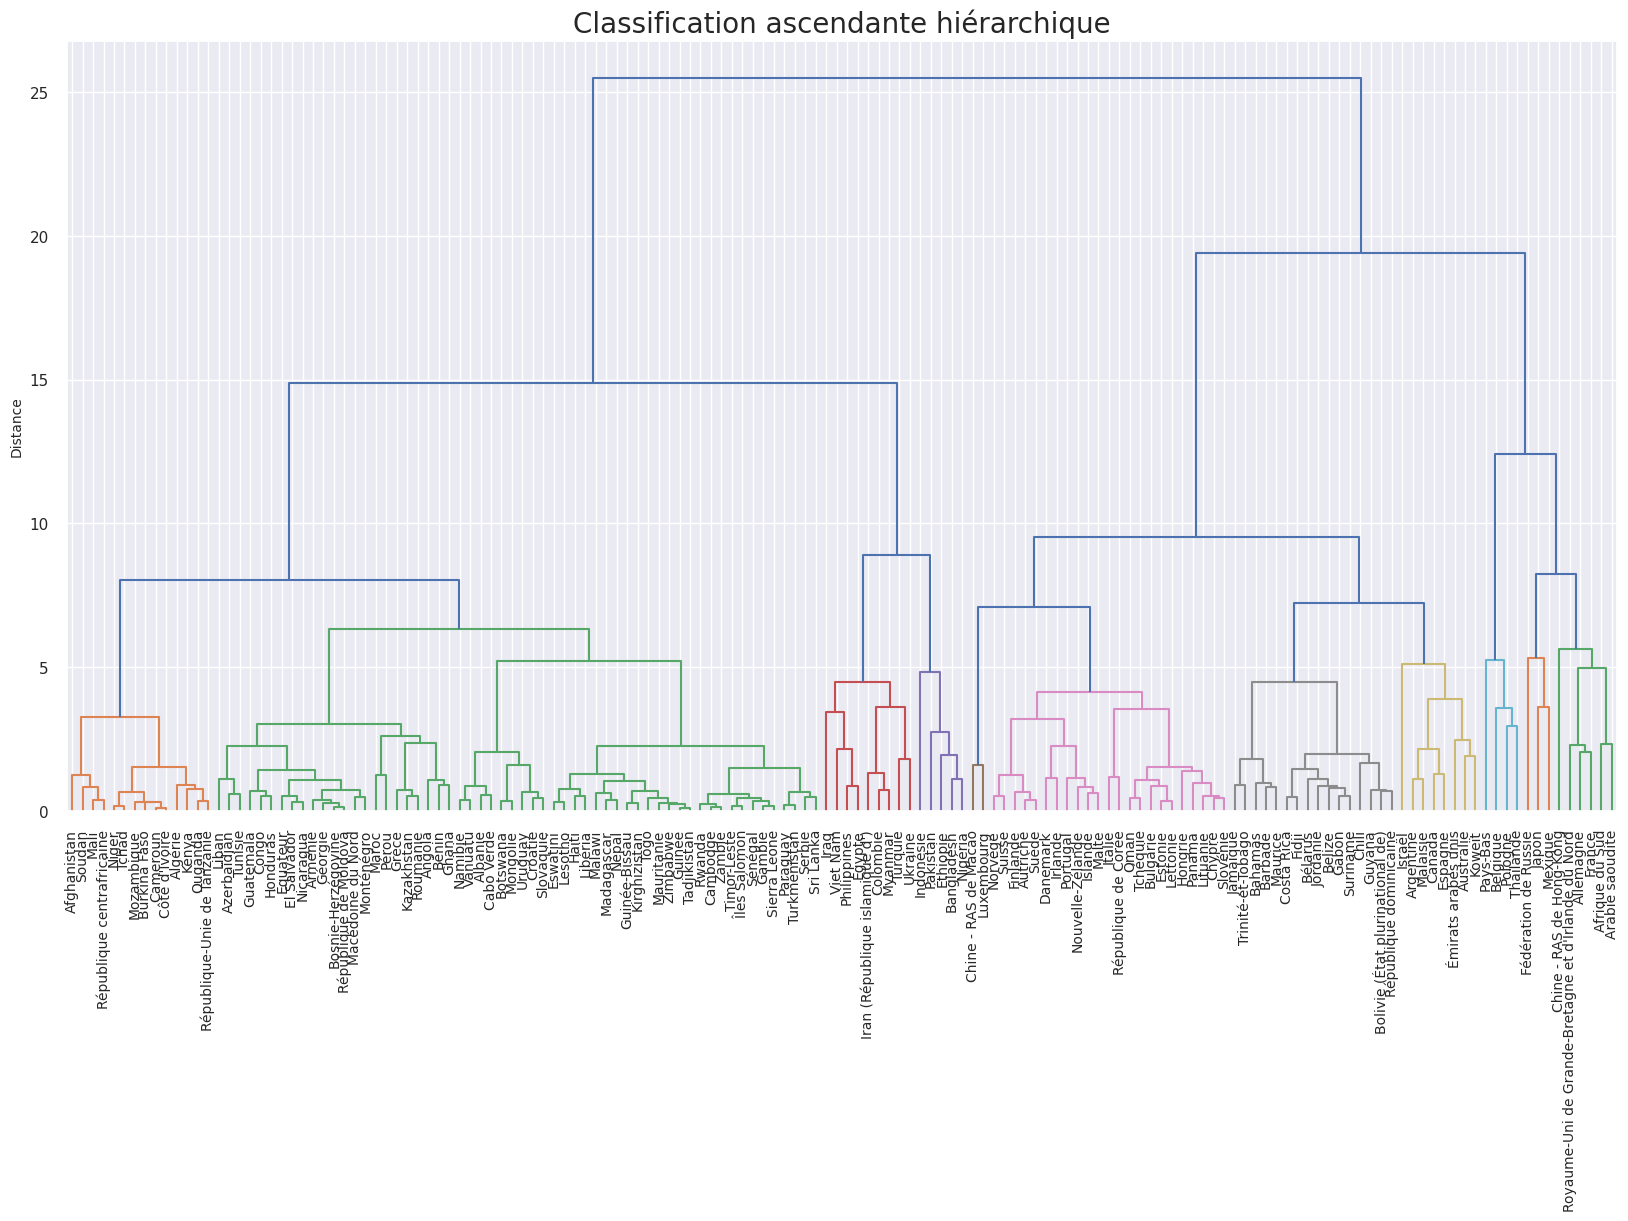

In [8]:
## Dendogramme

# Création d'une matrice des liens - Methode Ward
Z = linkage(data_std, method ='ward', metric ='euclidean')

# Gestion de la taille
fig = plt.figure(figsize=(20,10))

# Gestion du style, du titre et des legendes
plt.title('Classification ascendante hiérarchique', fontsize=20)
plt.ylabel('Distance', fontsize=10)
sns.set_style("white")

# Enregistrement et affichage du graphique
dendrogram(Z, labels = data.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.savefig("dendrogramme.png")
plt.show()

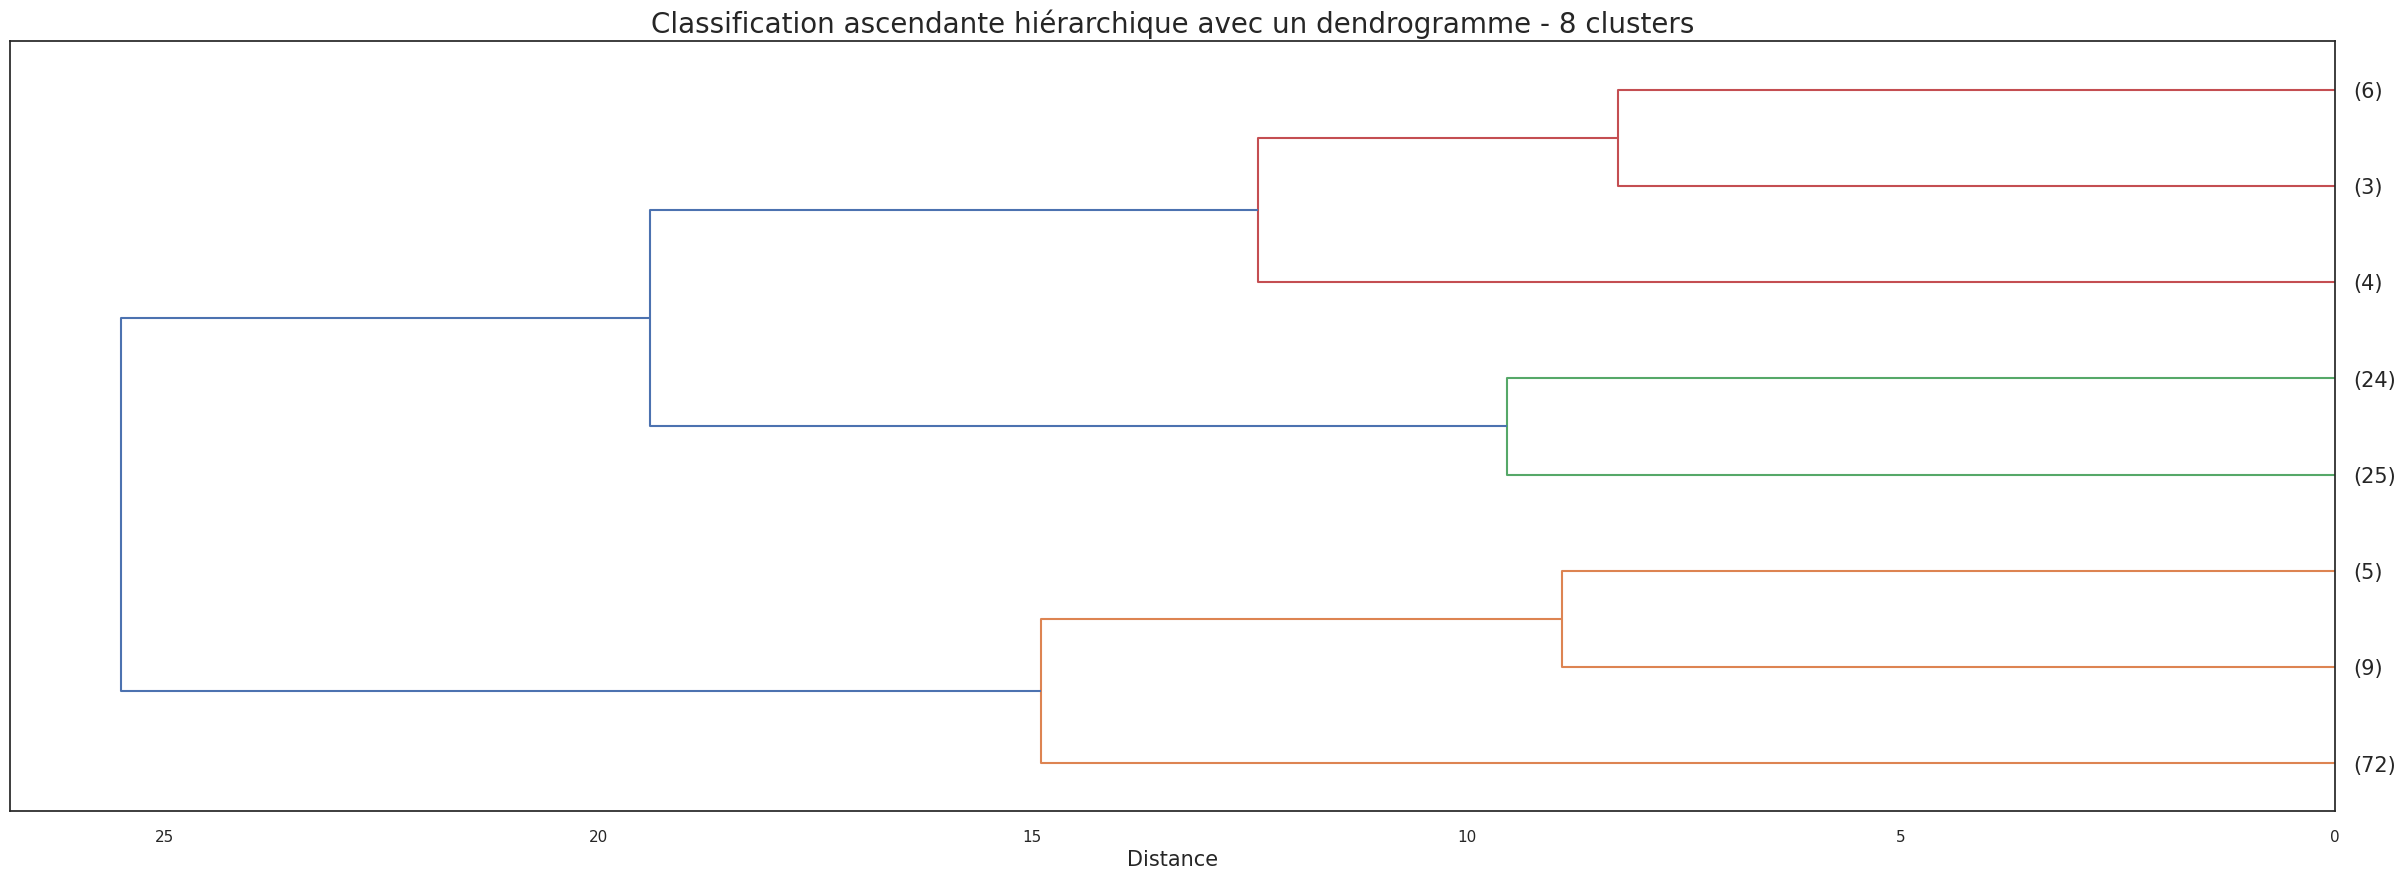

In [9]:
## Clustering
# Séparation temporaire du dendrogramme en 8 groupes potentiels

# Gestion de la taille
fig = plt.figure(figsize=(30,10))

# Gestion des titres et legendes
plt.title('Classification ascendante hiérarchique avec un dendrogramme - 8 clusters', fontsize=20)
plt.xlabel('Distance', fontsize=15)

# Enregistrement et affichage du graphique
dendrogram(Z, labels = data.index, p=8, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.savefig("dendrogramme_clusters5.png")
plt.show()

# Identification des 8 clusters obtenus
clusters_CAS = fcluster(Z, 8, criterion='maxclust')

# Index trié des groupes
index_group = np.argsort(clusters_CAS)

# Création d'un dataframe associant les pays à leur cluster respectif
data_CAS = pd.DataFrame(data.index[index_group], clusters_CAS[index_group]).reset_index()
data_CAS = data_CAS.rename(columns={'index':'Cluster'})

# Intégration des informations complémentaires
Group_CAS = pd.merge(data, data_CAS, on='Zone')

# Création d'un dataframe par cluster
data_CAS_1 = Group_CAS[Group_CAS['Cluster'] == 1]
data_CAS_2 = Group_CAS[Group_CAS['Cluster'] == 2]
data_CAS_3 = Group_CAS[Group_CAS['Cluster'] == 3]
data_CAS_4 = Group_CAS[Group_CAS['Cluster'] == 4]
data_CAS_5 = Group_CAS[Group_CAS['Cluster'] == 5]
data_CAS_6 = Group_CAS[Group_CAS['Cluster'] == 6]
data_CAS_7 = Group_CAS[Group_CAS['Cluster'] == 7]
data_CAS_8 = Group_CAS[Group_CAS['Cluster'] == 8]

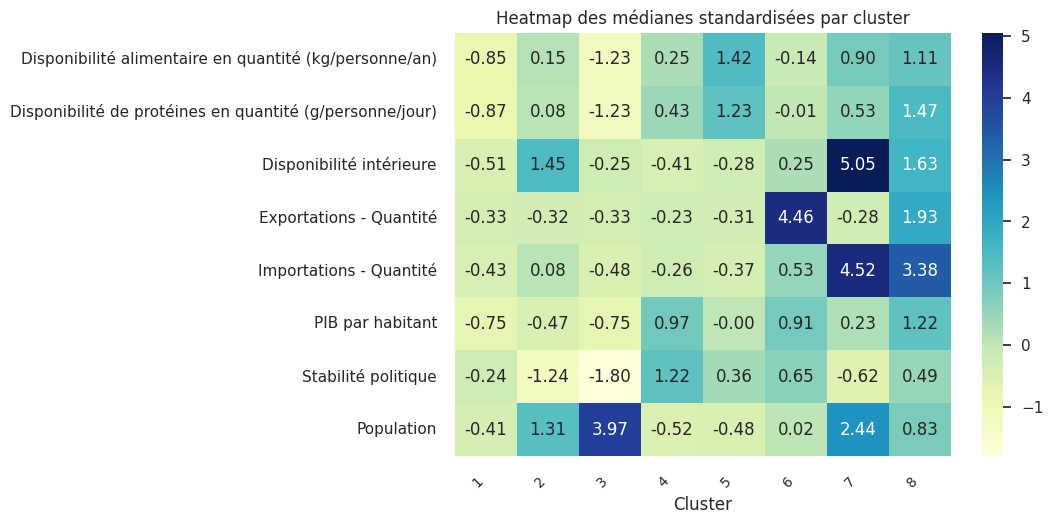

In [10]:
## Analyse préalable

# Analyse des moyennes
Group_CAS.drop(columns='Zone').groupby('Cluster').mean()

# Analyse des medianes
median_data = Group_CAS.drop(columns='Zone').groupby('Cluster').median()

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Group_CAS.drop(columns=['Zone', 'Cluster']))

# Création d'un dataframe avec les données standardisées
scaled_df = pd.DataFrame(scaled_data, columns=Group_CAS.drop(columns=['Zone', 'Cluster']).columns)

# Calcul des médianes pour chaque cluster
median_data = scaled_df.groupby(Group_CAS['Cluster']).median()

# Transposer le dataframe des médianes pour inverser les axes
transposed_median_data = median_data.T

## Heatmap

# Préparation des données pour le graphique
heatmap = sns.heatmap(transposed_median_data, annot=True, cmap="YlGnBu", fmt=".2f")

# Gestion du titre et des labels
plt.title("Heatmap des médianes standardisées par cluster")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Affichage et enregistrement du graphique
plt.savefig("heatmap_1.png")
plt.show()

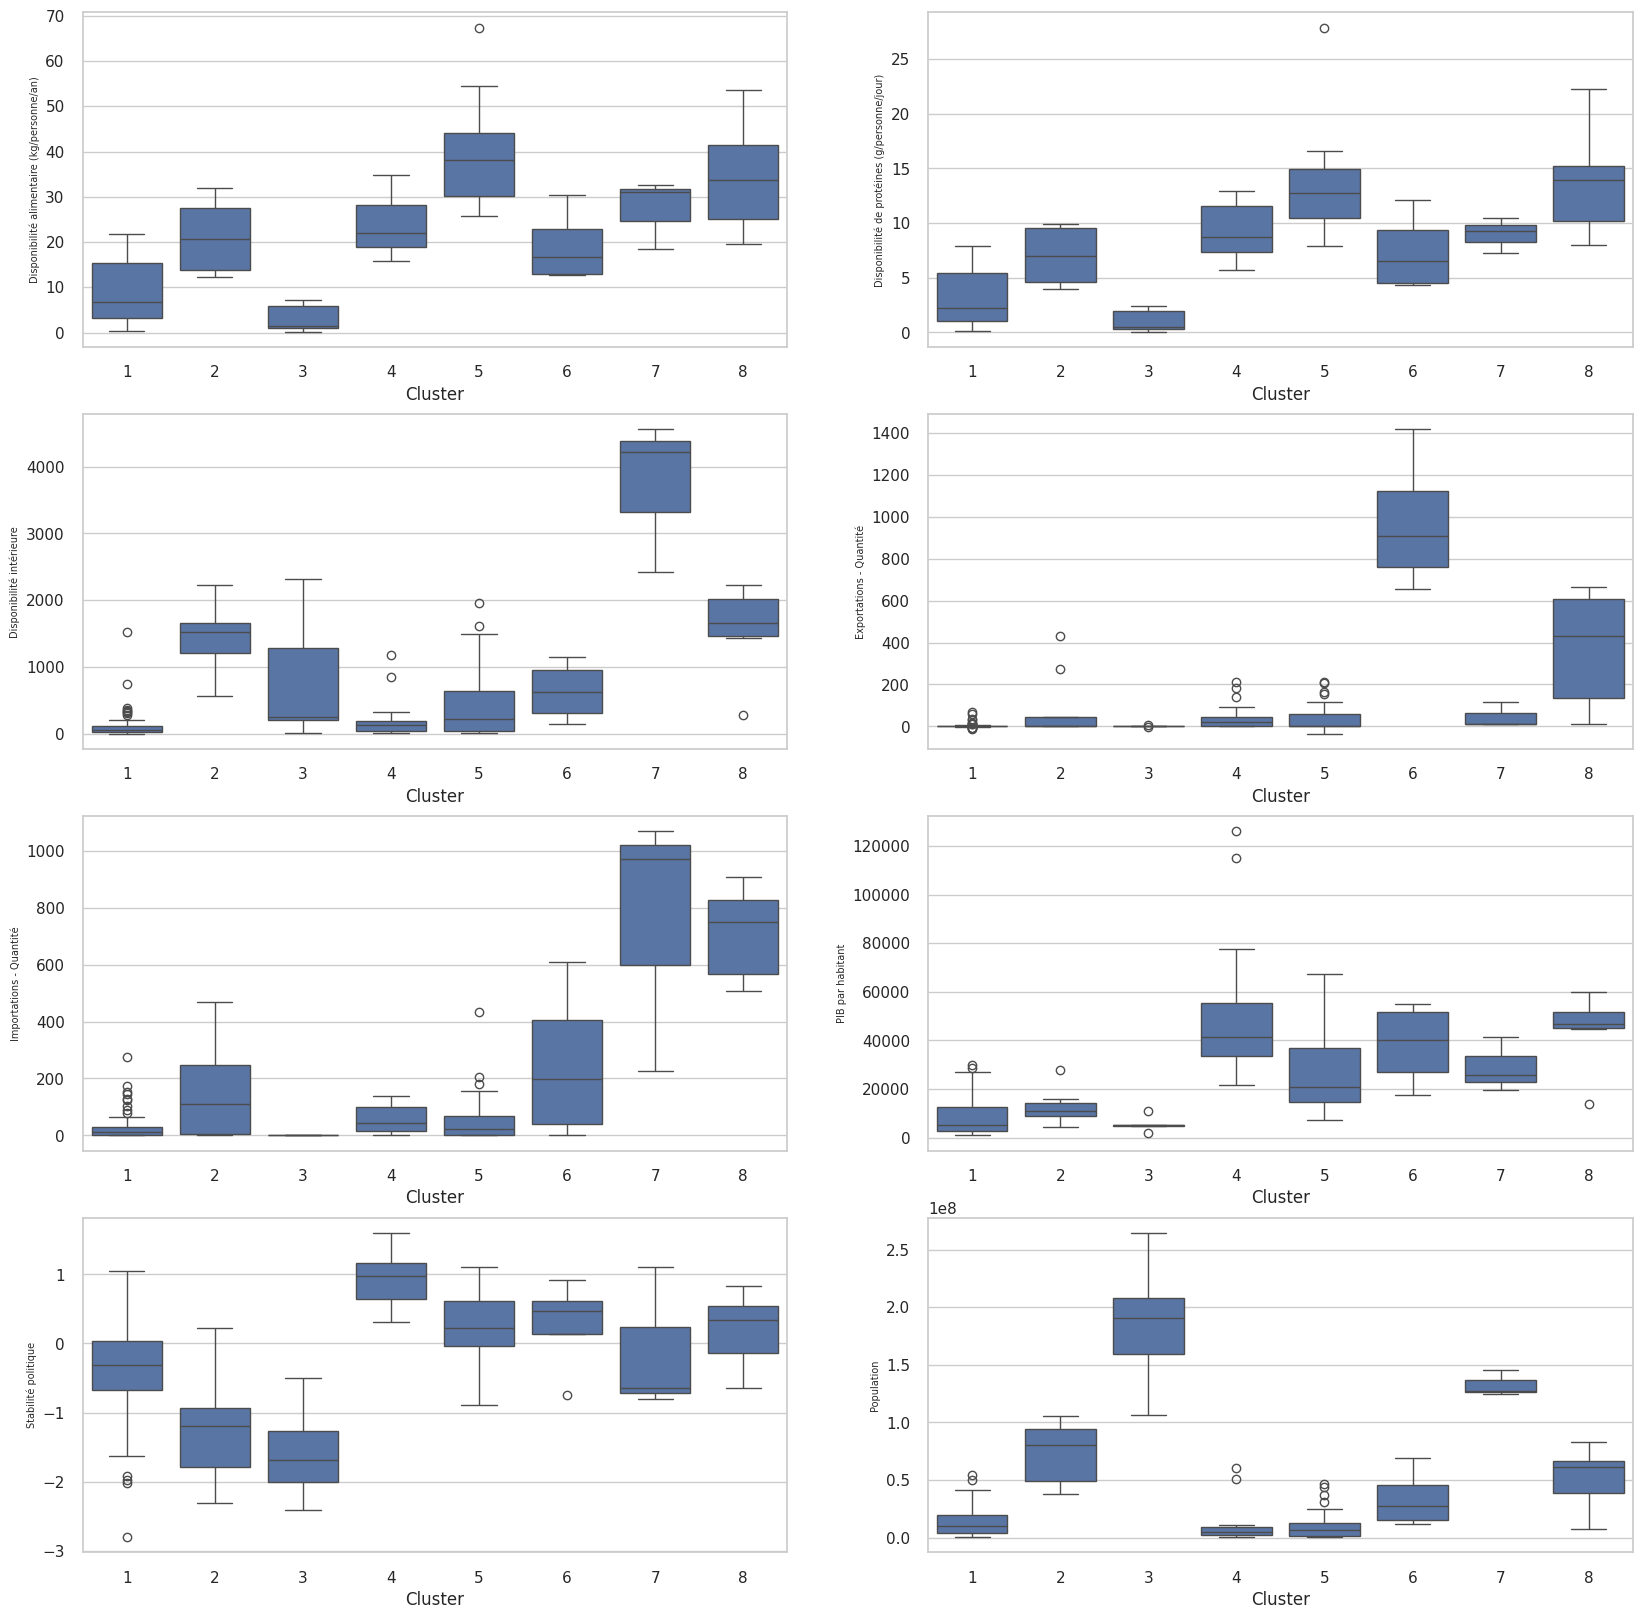

In [11]:
## Création de boxplots pour mieux visualiser les résulats obtenus

# Gestion de la taille et du style
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

# Création d'un graphique par variable
plt.subplot(421)
sns.boxplot(data=Group_CAS, x='Cluster', y='Disponibilité alimentaire en quantité (kg/personne/an)')
plt.ylabel('Disponibilité alimentaire (kg/personne/an)', fontsize=7)

plt.subplot(422)
sns.boxplot(data=Group_CAS, x='Cluster', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.ylabel('Disponibilité de protéines (g/personne/jour)', fontsize=7)

plt.subplot(423)
sns.boxplot(data=Group_CAS, x='Cluster', y='Disponibilité intérieure')
plt.ylabel('Disponibilité intérieure', fontsize=7)

plt.subplot(424)
sns.boxplot(data=Group_CAS, x='Cluster', y='Exportations - Quantité')
plt.ylabel('Exportations - Quantité', fontsize=7)

plt.subplot(425)
sns.boxplot(data=Group_CAS, x='Cluster', y='Importations - Quantité')
plt.ylabel('Importations - Quantité', fontsize=7)

plt.subplot(426)
sns.boxplot(data=Group_CAS, x='Cluster', y='PIB par habitant')
plt.ylabel('PIB par habitant', fontsize=7)

plt.subplot(427)
sns.boxplot(data=Group_CAS, x='Cluster', y='Stabilité politique')
plt.ylabel('Stabilité politique', fontsize=7)

plt.subplot(428)
sns.boxplot(data=Group_CAS, x='Cluster', y='Population')
plt.ylabel('Population', fontsize=7)

# Enregistrement et affichage du graphique
plt.savefig("boxplot_dendogramme.png")
plt.show(block=False)

In [12]:
# Aperçu des candidats du cluster 8
data_CAS_8

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,Cluster
1,Afrique du Sud,35.69,14.11,2118.0,63.0,514.0,13860.3,-0.28,57009756.0,8
4,Allemagne,19.47,7.96,1739.0,646.0,842.0,53071.5,0.59,82658409.0,8
6,Arabie saoudite,43.36,15.57,1435.0,10.0,722.0,47306.2,-0.64,33101178.0,8
29,Chine - RAS de Hong-Kong,53.51,22.26,280.0,663.0,907.0,59842.2,0.83,7306322.0,8
44,France,22.90,8.95,1573.0,501.0,506.0,44577.1,0.28,64842509.0,8
110,Royaume-Uni de Grande-Bretagne et d'Irlande du...,31.94,13.77,2234.0,359.0,779.0,46372.4,0.39,66727460.0,8


## Méthode Kmeans

La méthode du coude (Elbow Method) est une technique utilisée pour déterminer le nombre optimal de clusters dans un ensemble de données non étiquetées. Elle fonctionne en tracant la variation de l'inertie intra-cluster (inertia) en fonction du nombre de clusters.
L'inertie intra-cluster mesure la cohésion des clusters, c'est-à-dire à quel point les points d'un même cluster sont proches les uns des autres.

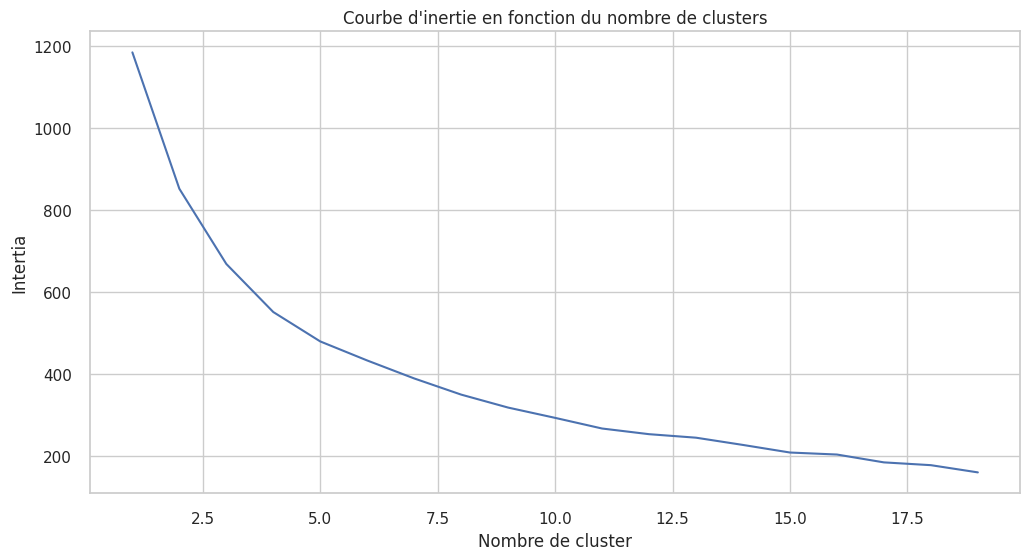

In [13]:
## Elbow method

# Stockage des inerties au sein d'une liste
intertia = []

# Nombre de clusters testés
k_list = range(1, 20)

# Calcul et stockage de l'inertie pour chaque Kmeans
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_std)
  intertia.append(kmeans.inertia_)

# Gestion de la taille
fig, ax = plt.subplots(1,1,figsize=(12,6))

# Labels
ax.set_ylabel("Intertia")
ax.set_xlabel("Nombre de cluster")
ax.plot(k_list, intertia)

# Titre
ax.set_title("Courbe d'inertie en fonction du nombre de clusters")

# Affichage du graphique
plt.show()

In [14]:
## Clustering

# Entrainement de l'estimateur Kmeans avec le nombre de clusters souhaités
nombreCluster = 8 # Nombre de cluster souhaités
kmeans = KMeans(n_clusters=nombreCluster, random_state=42)
kmeans.fit(data_std)

# Liste des clusters
labels = kmeans.labels_

# Aperçu des pays selon leur cluster
cluster_Kmeans = pd.DataFrame(data.index, labels).reset_index()
cluster_Kmeans = cluster_Kmeans.rename(columns={'index':'Cluster'})

# Intégration des informations complémentaires
data_kmeans = pd.merge(data, cluster_Kmeans, on='Zone')

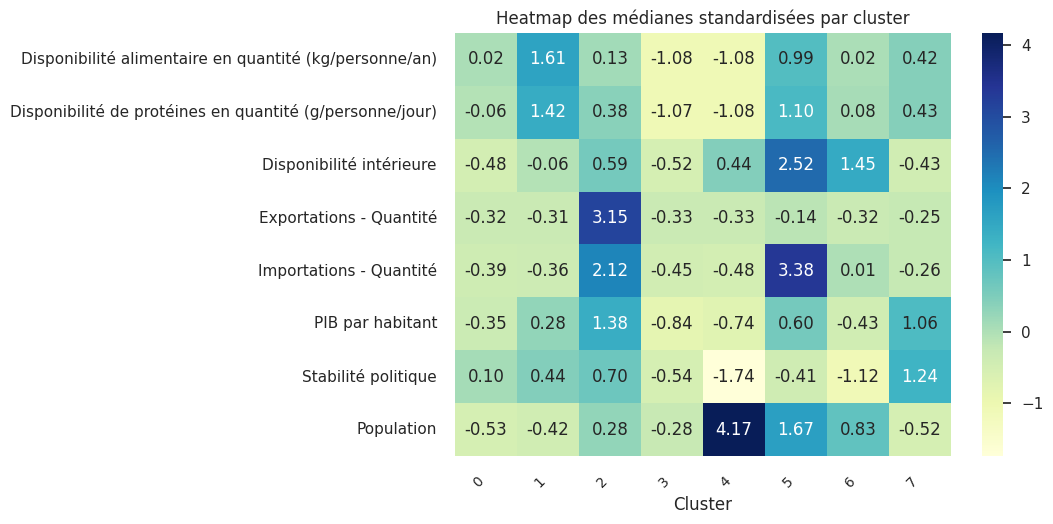

In [15]:
## Analyse préalable

# Analyse des moyennes
data_kmeans.drop(columns='Zone').groupby('Cluster').mean()

# Analyse des medianes
data_kmeans.drop(columns='Zone').groupby('Cluster').median()

# Calcul du nombre de pays par cluster
data_kmeans[['Zone','Cluster']].groupby('Cluster').count()

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_kmeans.drop(columns=['Zone', 'Cluster']))

# Création d'un dataframe avec les données standardisées
scaled_df = pd.DataFrame(scaled_data, columns=data_kmeans.drop(columns=['Zone', 'Cluster']).columns)

# Calcul des médianes pour chaque cluster
median_data_Km = scaled_df.groupby(data_kmeans['Cluster']).median()

# Transposer le dataframe des médianes pour inverser les axes
transposed_median_data_2 = median_data_Km.T

## Heatmap

# Préparation des données pour le graphique
heatmap = sns.heatmap(transposed_median_data_2, annot=True, cmap="YlGnBu", fmt=".2f")

# Gestion du titre et des labels
plt.title('Heatmap des médianes standardisées par cluster')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Affichage et enregistrement du graphique
plt.savefig("heatmap_2.png")
plt.show()

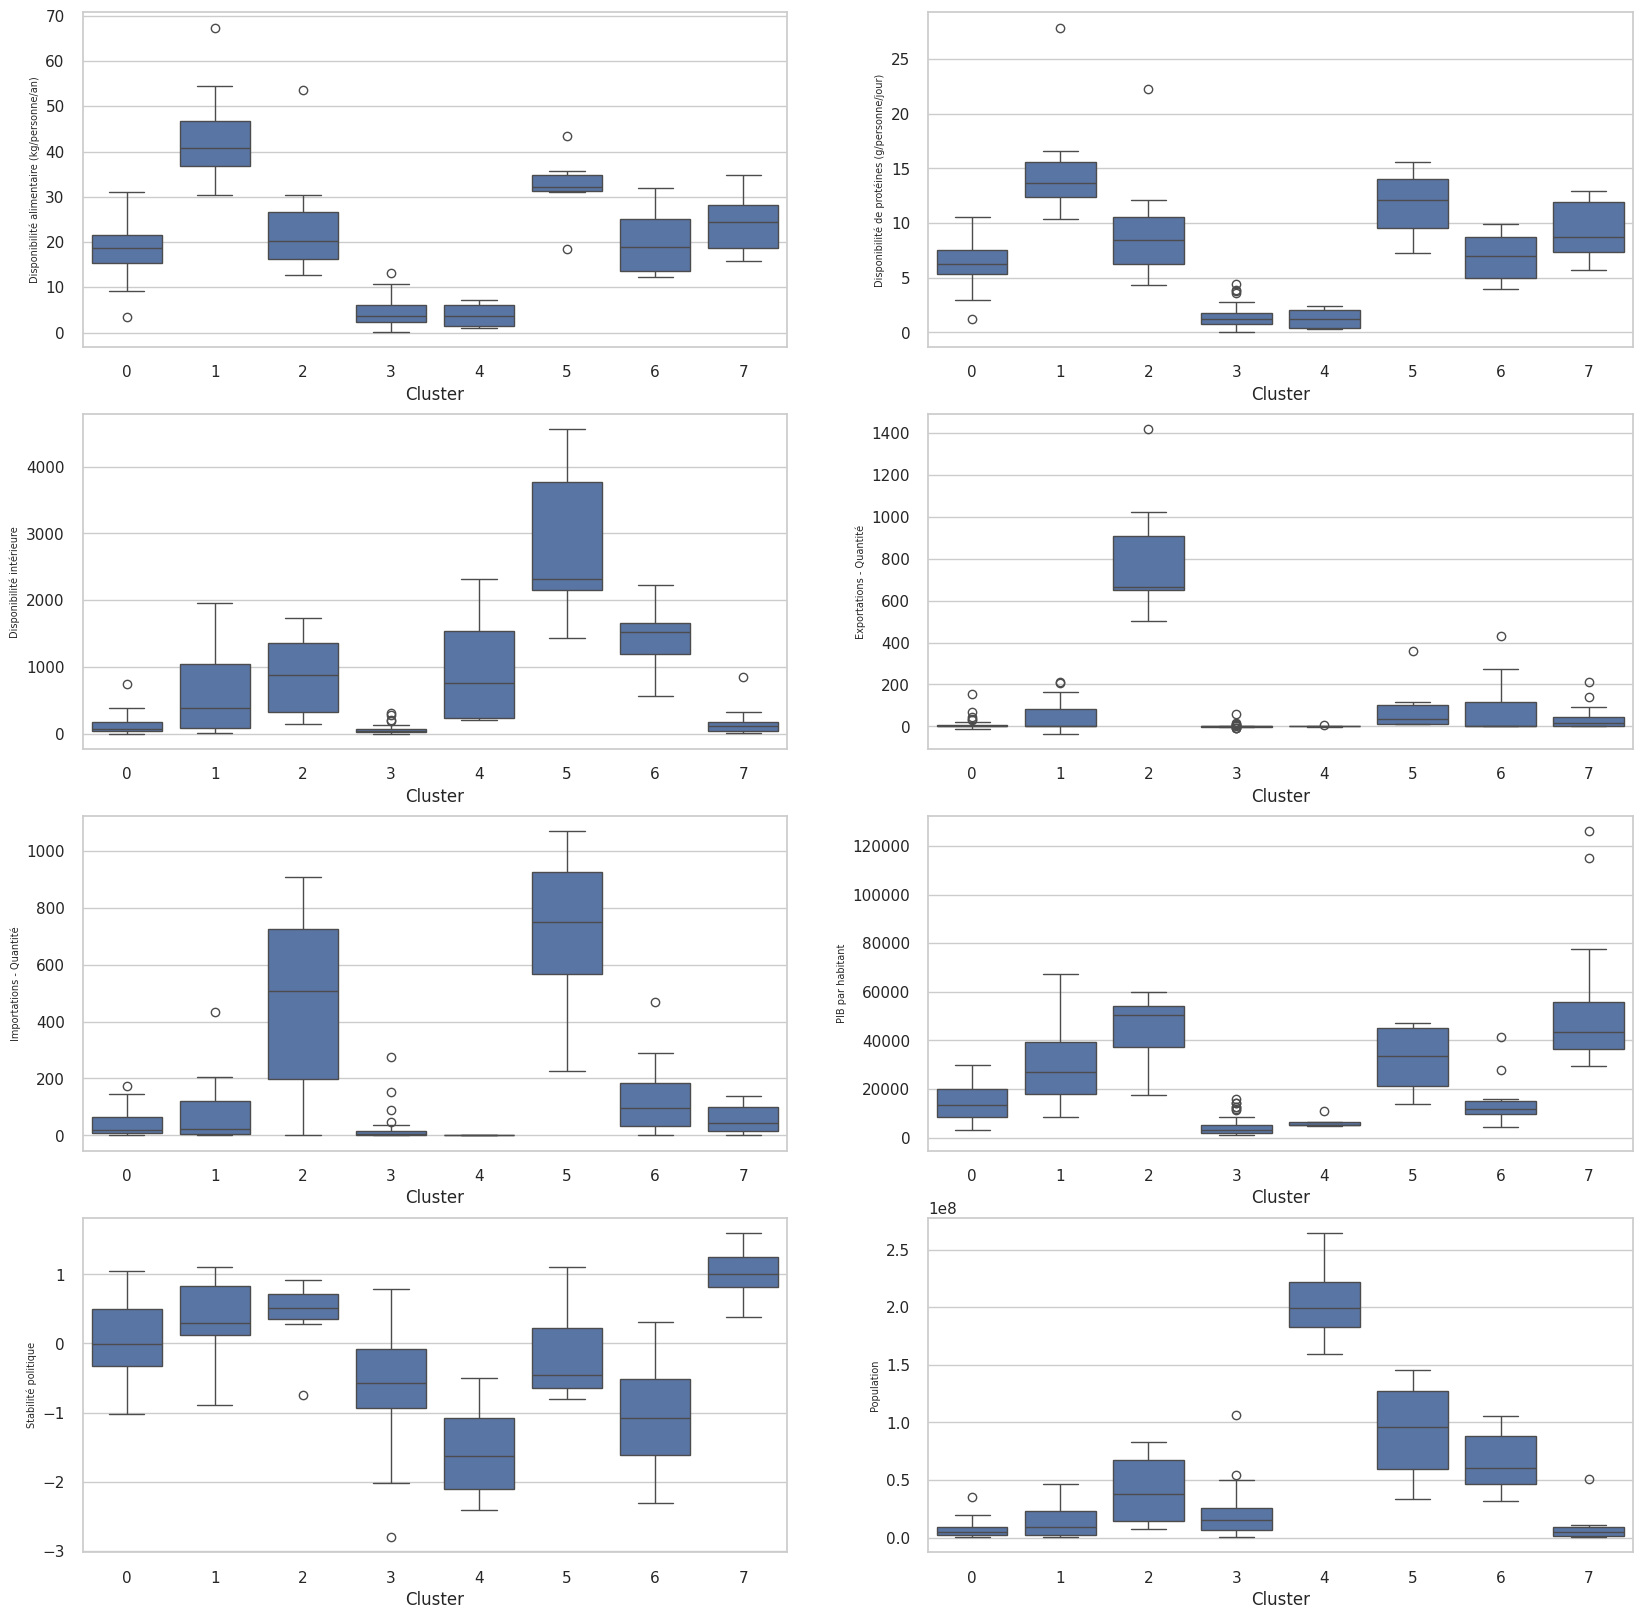

In [16]:
## Création de boxplots pour mieux visualiser les résulats obtenus

# Gestion de la taille et du style
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

# Création d'un graphique par variable
plt.subplot(421)
sns.boxplot(data=data_kmeans, x='Cluster', y='Disponibilité alimentaire en quantité (kg/personne/an)')
plt.ylabel('Disponibilité alimentaire (kg/personne/an)', fontsize=7)

plt.subplot(422)
sns.boxplot(data=data_kmeans, x='Cluster', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.ylabel('Disponibilité de protéines (g/personne/jour)', fontsize=7)

plt.subplot(423)
sns.boxplot(data=data_kmeans, x='Cluster', y='Disponibilité intérieure')
plt.ylabel('Disponibilité intérieure', fontsize=7)

plt.subplot(424)
sns.boxplot(data=data_kmeans, x='Cluster', y='Exportations - Quantité')
plt.ylabel('Exportations - Quantité', fontsize=7)

plt.subplot(425)
sns.boxplot(data=data_kmeans, x='Cluster', y='Importations - Quantité')
plt.ylabel('Importations - Quantité', fontsize=7)

plt.subplot(426)
sns.boxplot(data=data_kmeans, x='Cluster', y='PIB par habitant')
plt.ylabel('PIB par habitant', fontsize=7)

plt.subplot(427)
sns.boxplot(data=data_kmeans, x='Cluster', y='Stabilité politique')
plt.ylabel('Stabilité politique', fontsize=7)

plt.subplot(428)
sns.boxplot(data=data_kmeans, x='Cluster', y='Population')
plt.ylabel('Population', fontsize=7)

# Enregistrement et affichage du graphique
plt.savefig("boxplot_kmeans.png")
plt.show(block=False)


In [17]:
# Aperçu des candidats potentiels
data_Kmeans_2 = Group_CAS[data_kmeans['Cluster'] == 2]
data_Kmeans_2

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,Cluster
4,Allemagne,19.47,7.96,1739.0,646.0,842.0,53071.5,0.59,82658409.0,8
15,Belgique,12.65,4.57,152.0,656.0,338.0,50442.3,0.43,11419748.0,6
29,Chine - RAS de Hong-Kong,53.51,22.26,280.0,663.0,907.0,59842.2,0.83,7306322.0,8
44,France,22.90,8.95,1573.0,501.0,506.0,44577.1,0.28,64842509.0,8
104,Pays-Bas,20.33,8.48,372.0,1418.0,608.0,55088.6,0.92,17021347.0,6
106,Pologne,30.30,12.14,1156.0,1025.0,55.0,30064.5,0.52,37953180.0,6
130,Thaïlande,12.95,4.35,881.0,796.0,2.0,17423.0,-0.75,69209810.0,6


# Analyse en composantes principales

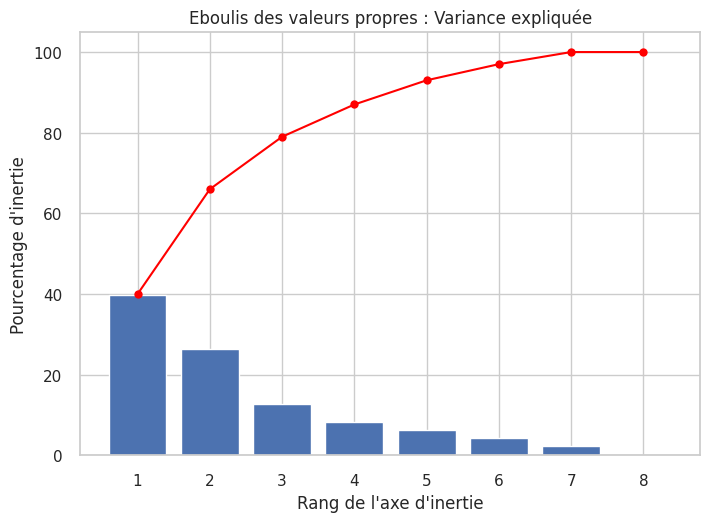

In [18]:
## Eboulis de valeurs propres - Variance expliquée - ACP

# Nombre de composantes principales analysées
n_components = 8

# Instanciation de la PCA
pca = PCA(n_components=n_components)

# Entrainement sur les données standardisées
pca.fit(data_std)

# Création d'un dataframe des proportions de variances expliquées pour chaque composante principale
variance_explique = pca.explained_variance_ratio_
data_variance = pd.DataFrame(variance_explique, columns=["Proportion de variance expliquée"], index=[f"PC{i+1}" for i in range(len(variance_explique))])

# Enregistrement des résultats
scree = (pca.explained_variance_ratio_*100).round(2)

# Calcul de la somme cumulée des variances expliquées
scree_cum = scree.cumsum().round()

# Liste des composantes principales
x_list = range(1, n_components+1)
list(x_list)

# Création d'un graphique
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')

# Gestion du titre et des labels
plt.title("Eboulis des valeurs propres : Variance expliquée")
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")

# Affichage des résultats
plt.show(block=False)


La variance de chaque composante principale est représentée en bleu.

En rouge, on retrouve la variance cumulée.

Près de 80% de la variance expliquée est comprise au sein des trois premières composantes principales.

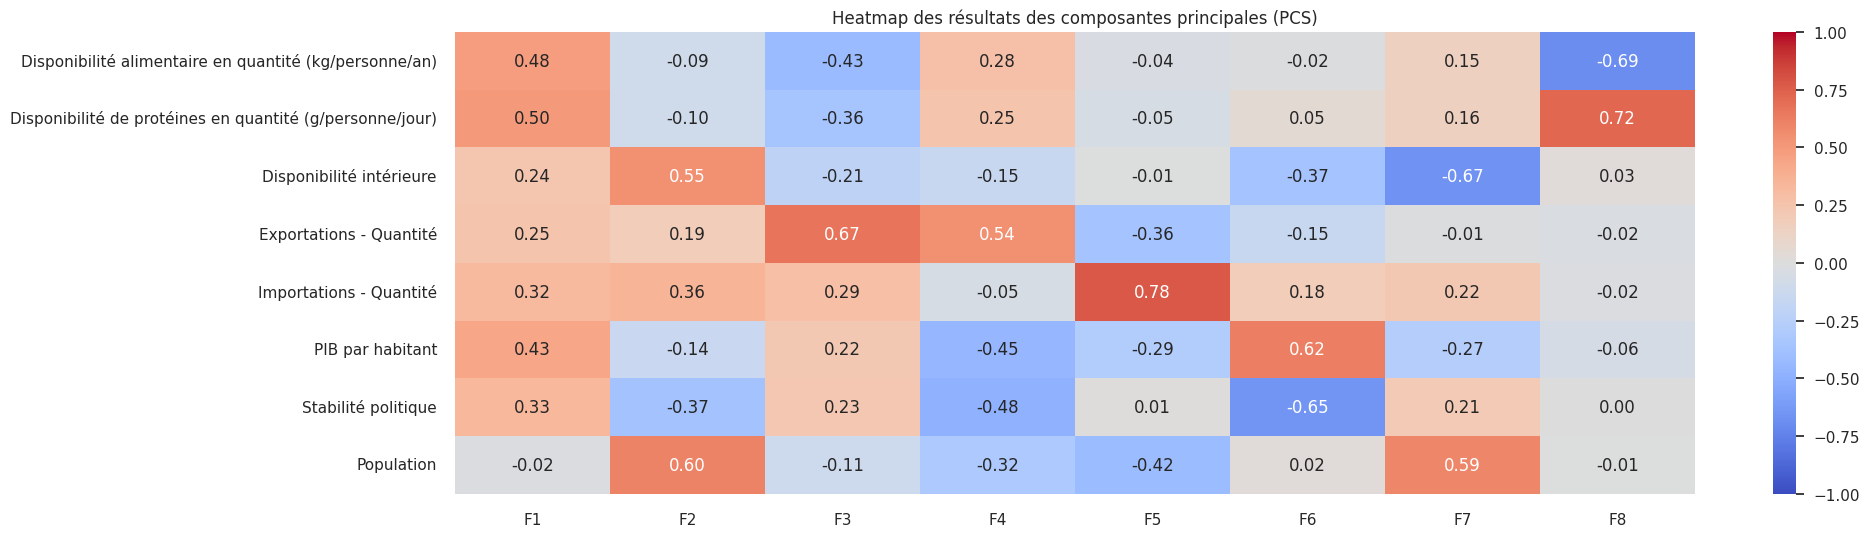

In [19]:
## Analyse des composantes principales

# Récupération des composantes principales
pcs = pca.components_

# Création d'un dataframe
pcs_data = pd.DataFrame(pcs)

# Ajout des variables originales
pcs_data.columns = features
pcs_data.index = [f"F{i}" for i in x_list]

# Affichage du résultat
pcs_data.T

# Création d'une heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs_data.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

# Gestion du titre
plt.title('Heatmap des résultats des composantes principales (PCS)')

# Affichage du résultat
plt.show()

In [20]:
## Mise en place d'une fonction
# Afficher les cercles de corrélations en fonctions des composantes principales choisies

def correlation_graph(pca, x_y, features) :
    # Extraction de X et Y
    x,y = x_y

    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 7))

    # Pour chaque composante principales
    for i in range(0, pca.components_.shape[1]):

        # Mise en place des flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Mise en place des labes
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du graphique
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Cercle de corrélation
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    # Affichage du graphique
    plt.axis('equal')
    plt.show(block=False)

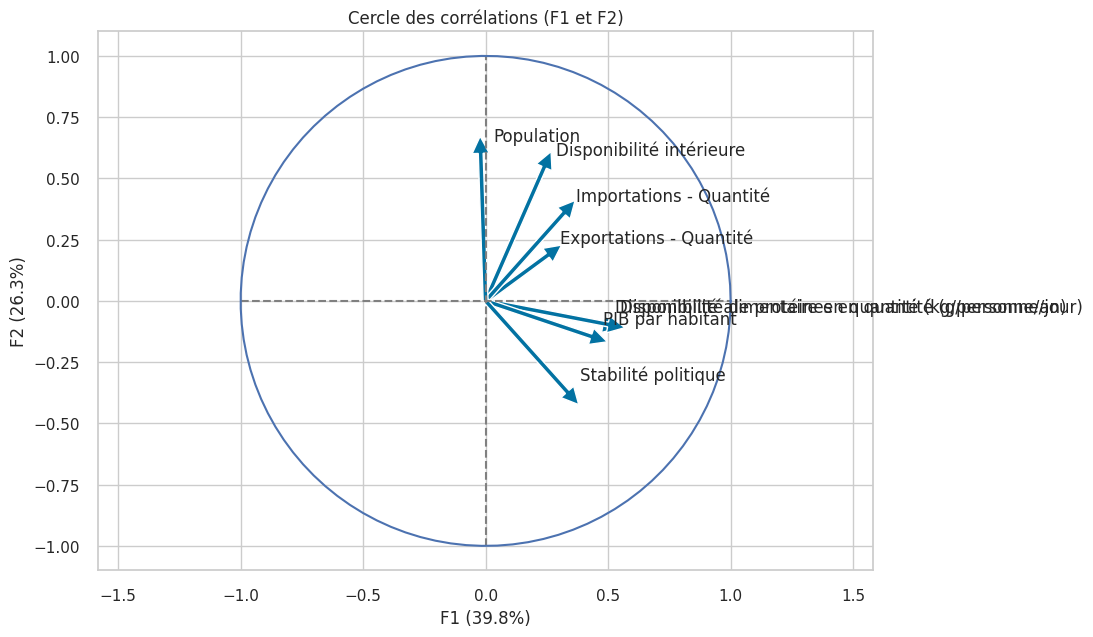

In [21]:
# Cercle de corrélation F1 & F2
correlation_graph(pca, (0,1), features)

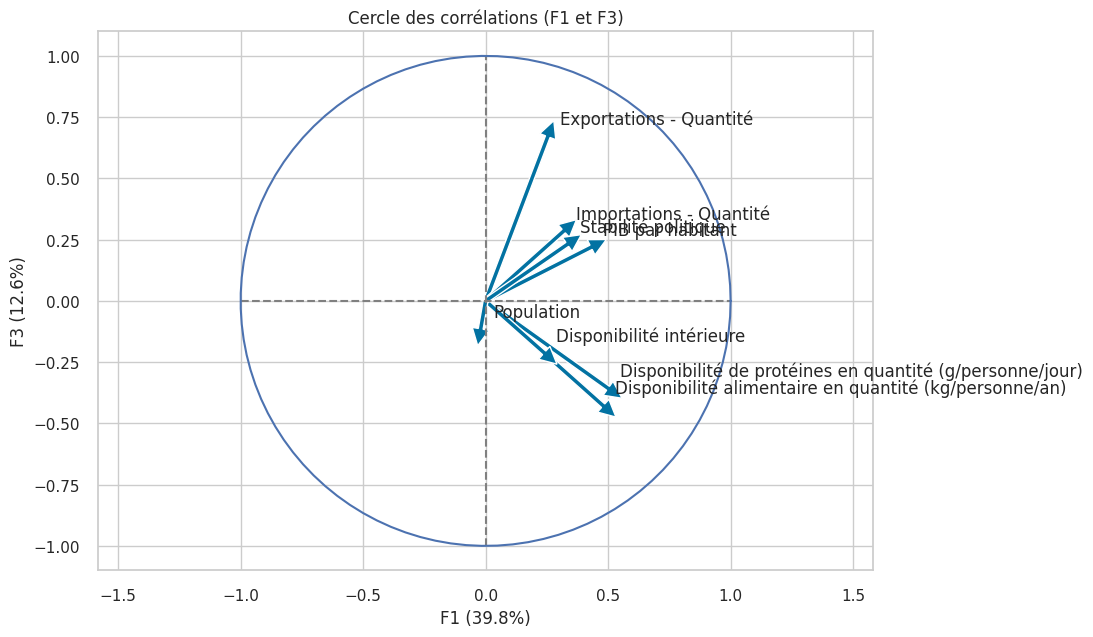

In [22]:
# Cercle de corrélation F1 & F3
correlation_graph(pca, (0,2), features)

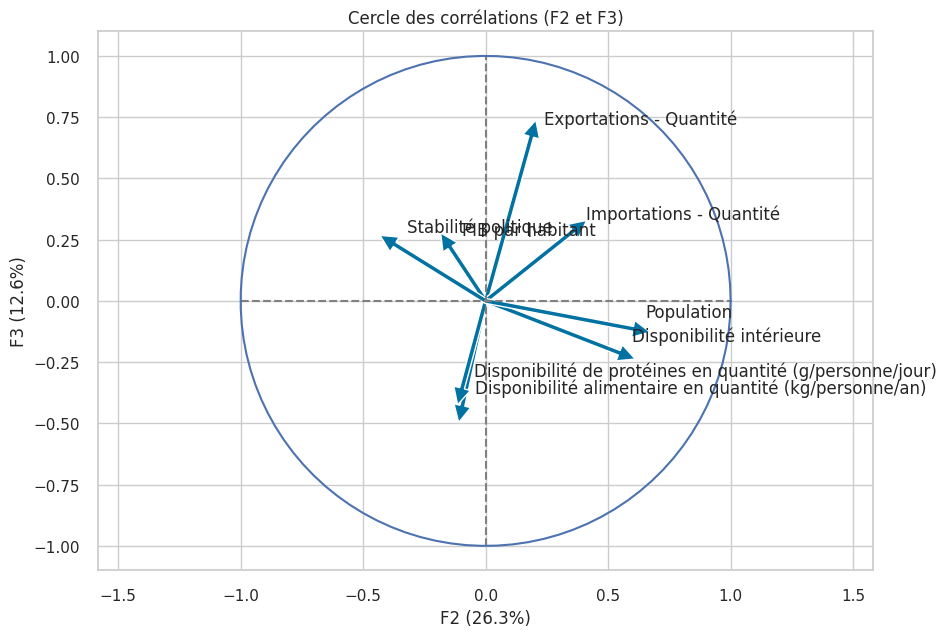

In [23]:
# Cercle de corrélation F2 & F3
correlation_graph(pca, (1,2), features)

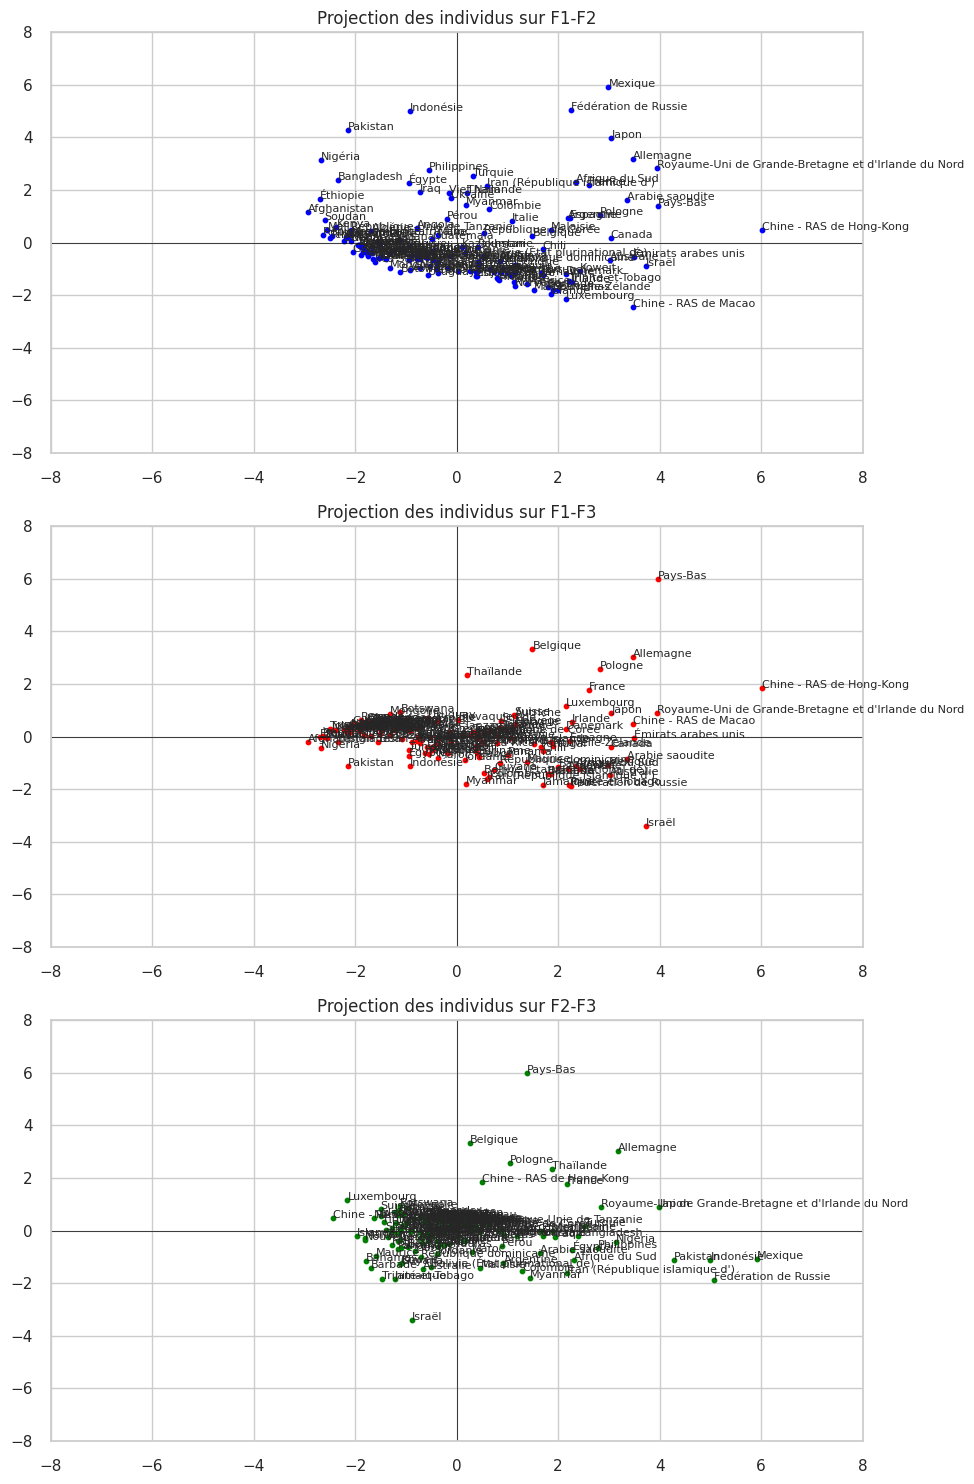

In [24]:
## Projection des individus

# Calcul des coordonnées des individus
X_proj = pca.transform(data_std)

# Extraction des noms de pays
pays = data.index

# Projection des individus sur les plans factoriels F1-F2, F1-F3 et F2-F3
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot F1-F2
axs[0].scatter(X_proj[:, 0], X_proj[:, 1], s=10, c='blue')
axs[0].set_title('Projection des individus sur F1-F2')
for i, txt in enumerate(pays):
    axs[0].annotate(txt, (X_proj[i, 0], X_proj[i, 1]), size=8)
axs[0].set_xlim(-8, 8)
axs[0].set_ylim(-8, 8)
axs[0].axhline(0, color='black',linewidth=0.5)
axs[0].axvline(0, color='black',linewidth=0.5)

# Plot F1-F3
axs[1].scatter(X_proj[:, 0], X_proj[:, 2], s=10, c='red')
axs[1].set_title('Projection des individus sur F1-F3')
for i, txt in enumerate(pays):
    axs[1].annotate(txt, (X_proj[i, 0], X_proj[i, 2]), size=8)
axs[1].set_xlim(-8, 8)
axs[1].set_ylim(-8, 8)
axs[1].axhline(0, color='black',linewidth=0.5)
axs[1].axvline(0, color='black',linewidth=0.5)

# Plot F2-F3
axs[2].scatter(X_proj[:, 1], X_proj[:, 2], s=10, c='green')
axs[2].set_title('Projection des individus sur F2-F3')
for i, txt in enumerate(pays):
    axs[2].annotate(txt, (X_proj[i, 1], X_proj[i, 2]), size=8)
axs[2].set_xlim(-8, 8)
axs[2].set_ylim(-8, 8)
axs[2].axhline(0, color='black',linewidth=0.5)
axs[2].axvline(0, color='black',linewidth=0.5)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


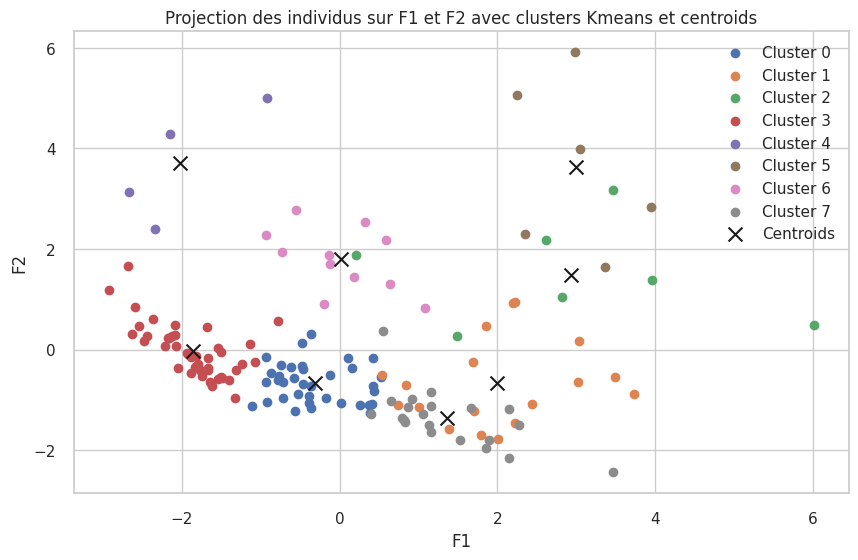

In [25]:
## Centroïdes

# Calcul des centroïdes
centroids = kmeans.cluster_centers_
centroids_proj = pca.transform(centroids)

# Gestion de la taille
plt.figure(figsize=(10, 6))

# Projection des individus
for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(X_proj[kmeans.labels_ == i, 0], X_proj[kmeans.labels_ == i, 1], label=f'Cluster {i}')

# Plot des centroïdes
plt.scatter(centroids_proj[:, 0], centroids_proj[:, 1], marker='x', s=100, color='k', label='Centroids')

# Gestion du titre, labels et legende
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Projection des individus sur F1 et F2 avec clusters Kmeans et centroids')
plt.legend()

# Affichage du graphique
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


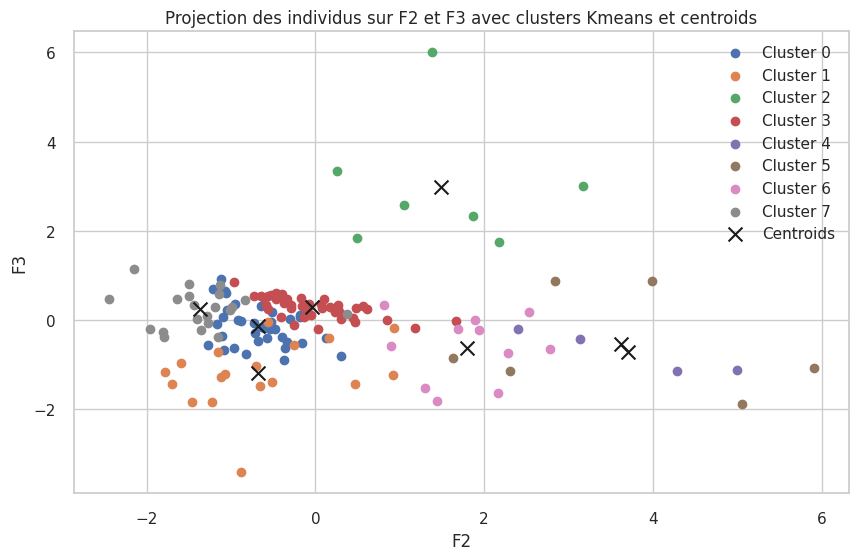

In [26]:
## Centroïdes

# Calcul des centroïdes
centroids = kmeans.cluster_centers_
centroids_proj = pca.transform(centroids)

# Gestion de la taille
plt.figure(figsize=(10, 6))

# Projection des individus
for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(X_proj[kmeans.labels_ == i, 1], X_proj[kmeans.labels_ == i, 2], label=f'Cluster {i}')

# Plot des centroïdes
plt.scatter(centroids_proj[:, 1], centroids_proj[:, 2], marker='x', s=100, color='k', label='Centroids')

# Gestion du titre, labels et legende
plt.xlabel('F2')
plt.ylabel('F3')
plt.title('Projection des individus sur F2 et F3 avec clusters Kmeans et centroids')
plt.legend()

# Affichage du graphique
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


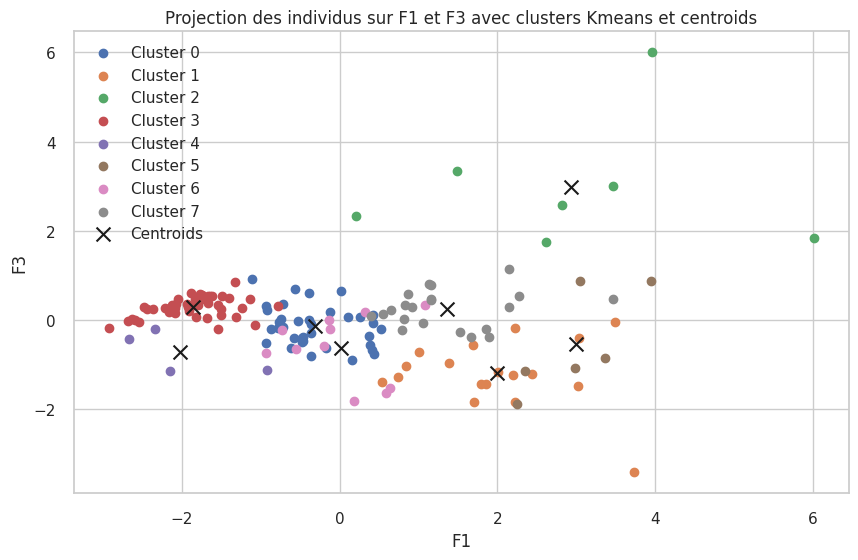

In [27]:
## Centroïdes

# Calcul des centroïdes
centroids = kmeans.cluster_centers_
centroids_proj = pca.transform(centroids)

# Gestion de la taille
plt.figure(figsize=(10, 6))

# Projection des individus
for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(X_proj[kmeans.labels_ == i, 0], X_proj[kmeans.labels_ == i, 2], label=f'Cluster {i}')

# Plot des centroïdes
plt.scatter(centroids_proj[:, 0], centroids_proj[:, 2], marker='x', s=100, color='k', label='Centroids')

# Gestion du titre, labels et legende
plt.xlabel('F1')
plt.ylabel('F3')
plt.title('Projection des individus sur F1 et F3 avec clusters Kmeans et centroids')
plt.legend()

# Affichage du graphique
plt.grid(True)
plt.show()


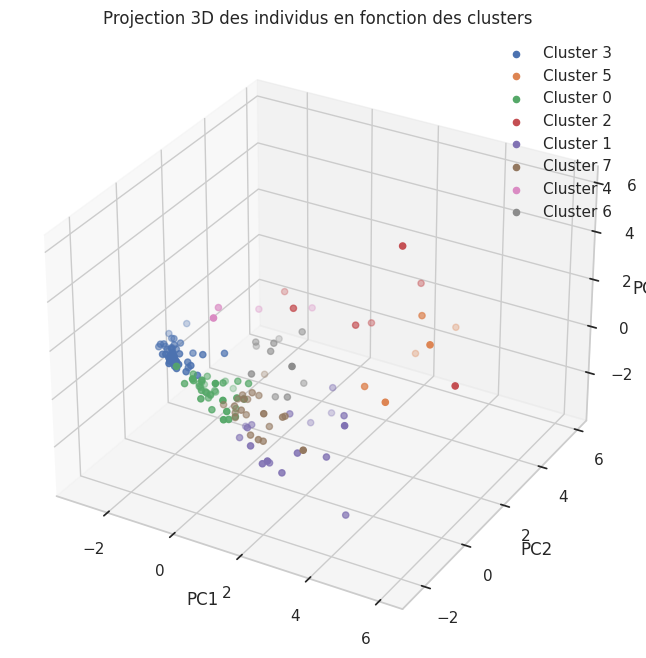

In [28]:
## Projection 3D

# Création du graphique
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Récupération des clusters
clusters = data_kmeans['Cluster'].unique()

# Affichage des individus en fonction des clusters
for cluster in clusters:
    ax.scatter(X_proj[data_kmeans['Cluster'] == cluster, 0],
               X_proj[data_kmeans['Cluster'] == cluster, 1],
               X_proj[data_kmeans['Cluster'] == cluster, 2],
               label='Cluster {}'.format(cluster))

# Ajout des labels et de la légende
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Projection 3D des individus en fonction des clusters')
ax.legend()

# Apercu du graphique
plt.show()

## Clustering post-analyse

In [29]:
## Données issue de l'ACP

# Transformation des données en composantes principales
pca_data = pca.transform(data_std)

# Création d'un DataFrame pour les composantes principales
data_ACP = pd.DataFrame(data=pca_data, columns=[f'PC{i}' for i in range(1, n_components+1)])

# Ajout des index de l'ancien DataFrame
data_ACP.index = data.index

# Suppression des composantes supplémentaires
data_ACP = data_ACP.loc[:, ['PC1', 'PC2', 'PC3']]

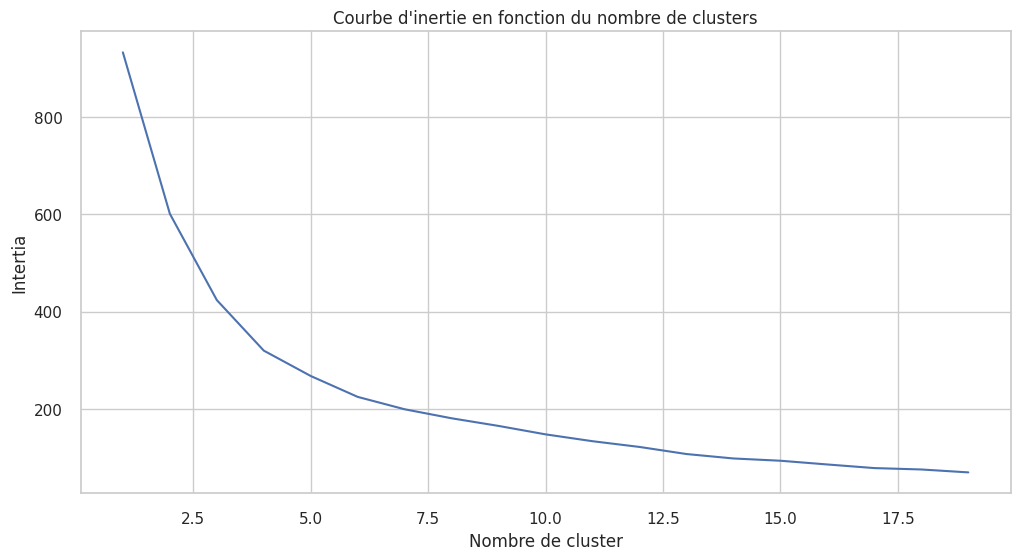

In [30]:
## Elbow method

# Stockage des inerties au sein d'une liste
intertia = []

# Nombre de clusters testés
k_list = range(1, 20)

# Calcul et stockage de l'inertie pour chaque Kmeans
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_ACP)
  intertia.append(kmeans.inertia_)

# Gestion de la taille
fig, ax = plt.subplots(1,1,figsize=(12,6))

# Labels
ax.set_ylabel("Intertia")
ax.set_xlabel("Nombre de cluster")
ax.plot(k_list, intertia)

# Titre
ax.set_title("Courbe d'inertie en fonction du nombre de clusters")

# Affichage du graphique
plt.show()

In [31]:
## Clustering

# Entrainement de l'estimateur Kmeans avec le nombre de clusters souhaités
nombreCluster = 5 # Nombre de cluster souhaités
kmean_ACP = KMeans(n_clusters=nombreCluster, random_state=42)
kmean_ACP.fit(data_ACP)

# Liste des clusters
labels_ACP = kmean_ACP.labels_

# Affichage des pays selon leur cluster
cluster_Kmeans_ACP = pd.DataFrame(data.index, labels_ACP).reset_index()
cluster_Kmeans_ACP = cluster_Kmeans_ACP.rename(columns={'index':'Cluster'})

# Intégration des informations complémentaires
data_kmeans_ACP = pd.merge(data_ACP, cluster_Kmeans_ACP, on='Zone')

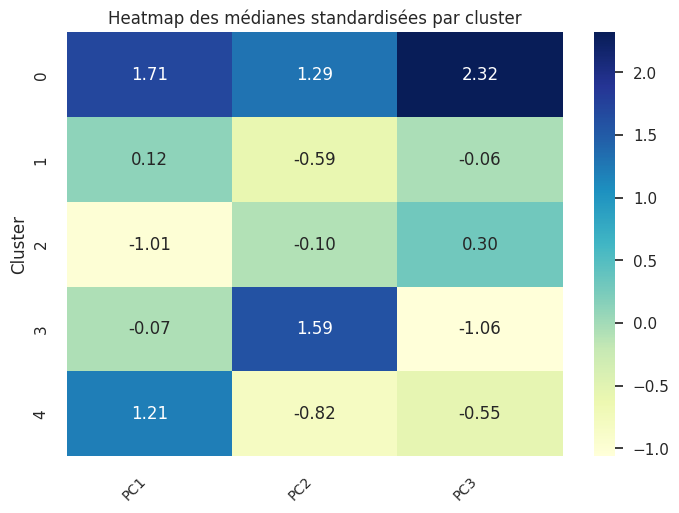

In [32]:
## Analyse préalable

# Analyse des moyennes
data_kmeans_ACP.drop(columns='Zone').groupby('Cluster').mean()

# Analyse des medianes
median_kmeans_ACP = data_kmeans_ACP.drop(columns='Zone').groupby('Cluster').median()

# Calcul du nombre de pays par cluster
data_kmeans_ACP[['Zone','Cluster']].groupby('Cluster').count()

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_kmeans_ACP.drop(columns=['Zone', 'Cluster']))

# Création d'un dataframe avec les données standardisées
scaled_df = pd.DataFrame(scaled_data, columns=data_kmeans_ACP.drop(columns=['Zone', 'Cluster']).columns)

# Calcul des médianes pour chaque cluster
median_kmeans_ACP = scaled_df.groupby(data_kmeans_ACP['Cluster']).median()

## Heatmap

# Préparation des données pour le graphique
heatmap = sns.heatmap(median_kmeans_ACP, annot=True, cmap="YlGnBu", fmt=".2f")

# Gestion du titre et des labels
plt.title('Heatmap des médianes standardisées par cluster')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Affichage et enregistrement du graphique
plt.show()

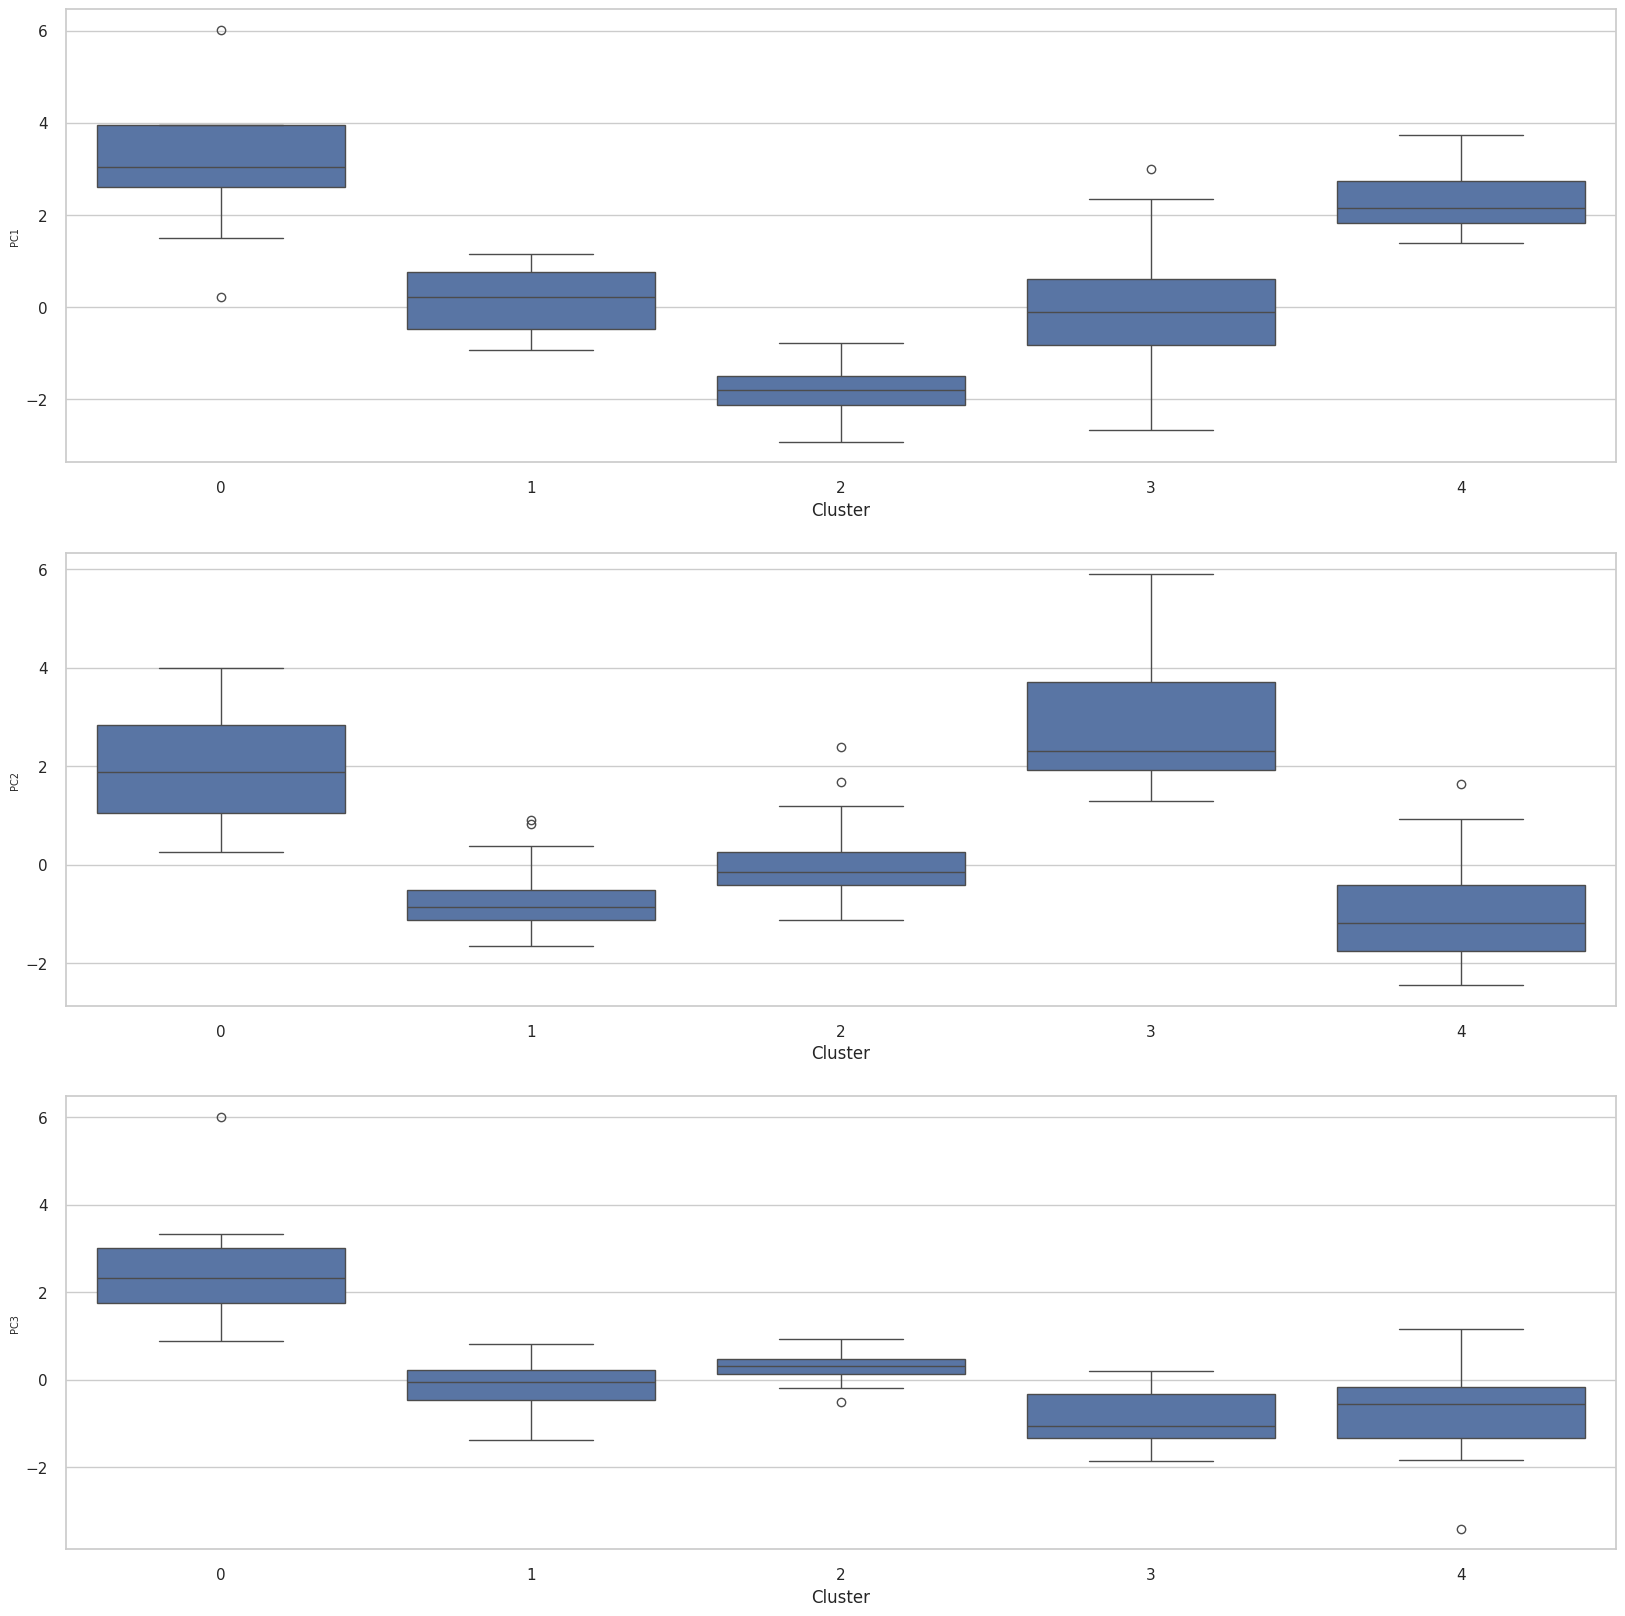

In [33]:
## Création de boxplots pour mieux visualiser les résulats obtenus

# Gestion de la taille et du style
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

# Création d'un graphique par variable
plt.subplot(311)
sns.boxplot(data=data_kmeans_ACP, x='Cluster', y='PC1')
plt.ylabel('PC1', fontsize=7)

plt.subplot(312)
sns.boxplot(data=data_kmeans_ACP, x='Cluster', y='PC2')
plt.ylabel('PC2', fontsize=7)

plt.subplot(313)
sns.boxplot(data=data_kmeans_ACP, x='Cluster', y='PC3')
plt.ylabel('PC3', fontsize=7)

# Enregistrement et affichage du graphique
plt.savefig("boxplot_kmeans_ACP.png")
plt.show(block=False)


In [34]:
# Aperçu des candidats potentiels
data_Kmeans_0_ACP = data_kmeans_ACP[data_kmeans_ACP['Cluster'] == 0]
data_Kmeans_0_ACP

,Zone,PC1,PC2,PC3,Cluster
4,Allemagne,3.471030,3.174224,3.011313,0
15,Belgique,1.494581,0.260808,3.337346,0
29,Chine - RAS de Hong-Kong,6.012785,0.495837,1.843461,0
44,France,2.611018,2.179210,1.757723,0
66,Japon,3.045229,3.994143,0.885712,0
104,Pays-Bas,3.959355,1.380443,6.000423,0
106,Pologne,2.823406,1.052569,2.591411,0
110,Royaume-Uni de Grande-Bretagne et d'Irlande du...,3.954513,2.838820,0.888148,0
130,Thaïlande,0.209198,1.874625,2.330200,0


# Analyse des clusters

## Clusters issues de la classification ascendante hiérarchique

In [35]:
# Aperçu des candidats
data_CAS_8

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,Cluster
1,Afrique du Sud,35.69,14.11,2118.0,63.0,514.0,13860.3,-0.28,57009756.0,8
4,Allemagne,19.47,7.96,1739.0,646.0,842.0,53071.5,0.59,82658409.0,8
6,Arabie saoudite,43.36,15.57,1435.0,10.0,722.0,47306.2,-0.64,33101178.0,8
29,Chine - RAS de Hong-Kong,53.51,22.26,280.0,663.0,907.0,59842.2,0.83,7306322.0,8
44,France,22.90,8.95,1573.0,501.0,506.0,44577.1,0.28,64842509.0,8
110,Royaume-Uni de Grande-Bretagne et d'Irlande du...,31.94,13.77,2234.0,359.0,779.0,46372.4,0.39,66727460.0,8


## Clusters issues de l'analyse Kmeans

In [36]:
# Aperçu des candidats avant l'analyse en composantes principales
data_Kmeans_2

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,Cluster
4,Allemagne,19.47,7.96,1739.0,646.0,842.0,53071.5,0.59,82658409.0,8
15,Belgique,12.65,4.57,152.0,656.0,338.0,50442.3,0.43,11419748.0,6
29,Chine - RAS de Hong-Kong,53.51,22.26,280.0,663.0,907.0,59842.2,0.83,7306322.0,8
44,France,22.90,8.95,1573.0,501.0,506.0,44577.1,0.28,64842509.0,8
104,Pays-Bas,20.33,8.48,372.0,1418.0,608.0,55088.6,0.92,17021347.0,6
106,Pologne,30.30,12.14,1156.0,1025.0,55.0,30064.5,0.52,37953180.0,6
130,Thaïlande,12.95,4.35,881.0,796.0,2.0,17423.0,-0.75,69209810.0,6


In [37]:
# Aperçu des candidats après l'analyse en composantes principales
data_Kmeans_0_ACP

,Zone,PC1,PC2,PC3,Cluster
4,Allemagne,3.471030,3.174224,3.011313,0
15,Belgique,1.494581,0.260808,3.337346,0
29,Chine - RAS de Hong-Kong,6.012785,0.495837,1.843461,0
44,France,2.611018,2.179210,1.757723,0
66,Japon,3.045229,3.994143,0.885712,0
104,Pays-Bas,3.959355,1.380443,6.000423,0
106,Pologne,2.823406,1.052569,2.591411,0
110,Royaume-Uni de Grande-Bretagne et d'Irlande du...,3.954513,2.838820,0.888148,0
130,Thaïlande,0.209198,1.874625,2.330200,0


# Conclusion

Les pays que l'on retrouve le plus souvent sont :

*   Allemagne
*   Chine - RAS de Hong-Kong
*   France
*   Royaume-Uni de Grande-Bretagne et d'Irlande du Nord



In [38]:
# Liste des pays à extraire
pays_a_extraire = ['Allemagne', 'Chine - RAS de Hong-Kong', 'France',
                   'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord', 'Belgique','Pays-Bas','Pologne','Japon','Thaïlande']

pays_a_extraire_2 = ["États-Unis d'Amérique", 'Brésil', 'Inde']

# Filtrer le DataFrame pour inclure uniquement les pays spécifiés
df_pays = data[data.index.isin(pays_a_extraire)]

# Filtrer le DataFrame pour inclure uniquement les pays spécifiés
df_pays_2 = data_outlier.loc[data_outlier['Zone'].isin(pays_a_extraire_2)]
df_pays_2 = data_outlier.set_index('Zone').loc[pays_a_extraire_2]

# Concaténer les deux DataFrames
df_concat = pd.concat([df_pays, df_pays_2])

# Trier le DataFrame selon la disponibilité de protéines en quantité décroissante
df_concat = df_concat.sort_values(by='Disponibilité de protéines en quantité (g/personne/jour)', ascending=False)

# Afficher le DataFrame trié
df_concat

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population
Zone,,,,,,,,
Chine - RAS de Hong-Kong,53.51,22.26,280.0,663.0,907.0,59842.2,0.83,7.306322e+06
États-Unis d'Amérique,55.68,19.93,18266.0,3692.0,123.0,59914.8,0.29,3.250848e+08
Brésil,48.03,15.68,9982.0,4223.0,3.0,14524.6,-0.47,2.078338e+08
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,31.94,13.77,2234.0,359.0,779.0,46372.4,0.39,6.672746e+07
Pologne,30.30,12.14,1156.0,1025.0,55.0,30064.5,0.52,3.795318e+07
France,22.90,8.95,1573.0,501.0,506.0,44577.1,0.28,6.484251e+07
Pays-Bas,20.33,8.48,372.0,1418.0,608.0,55088.6,0.92,1.702135e+07
Allemagne,19.47,7.96,1739.0,646.0,842.0,53071.5,0.59,8.265841e+07
Japon,18.50,7.24,2415.0,10.0,1069.0,41444.2,1.11,1.275027e+08


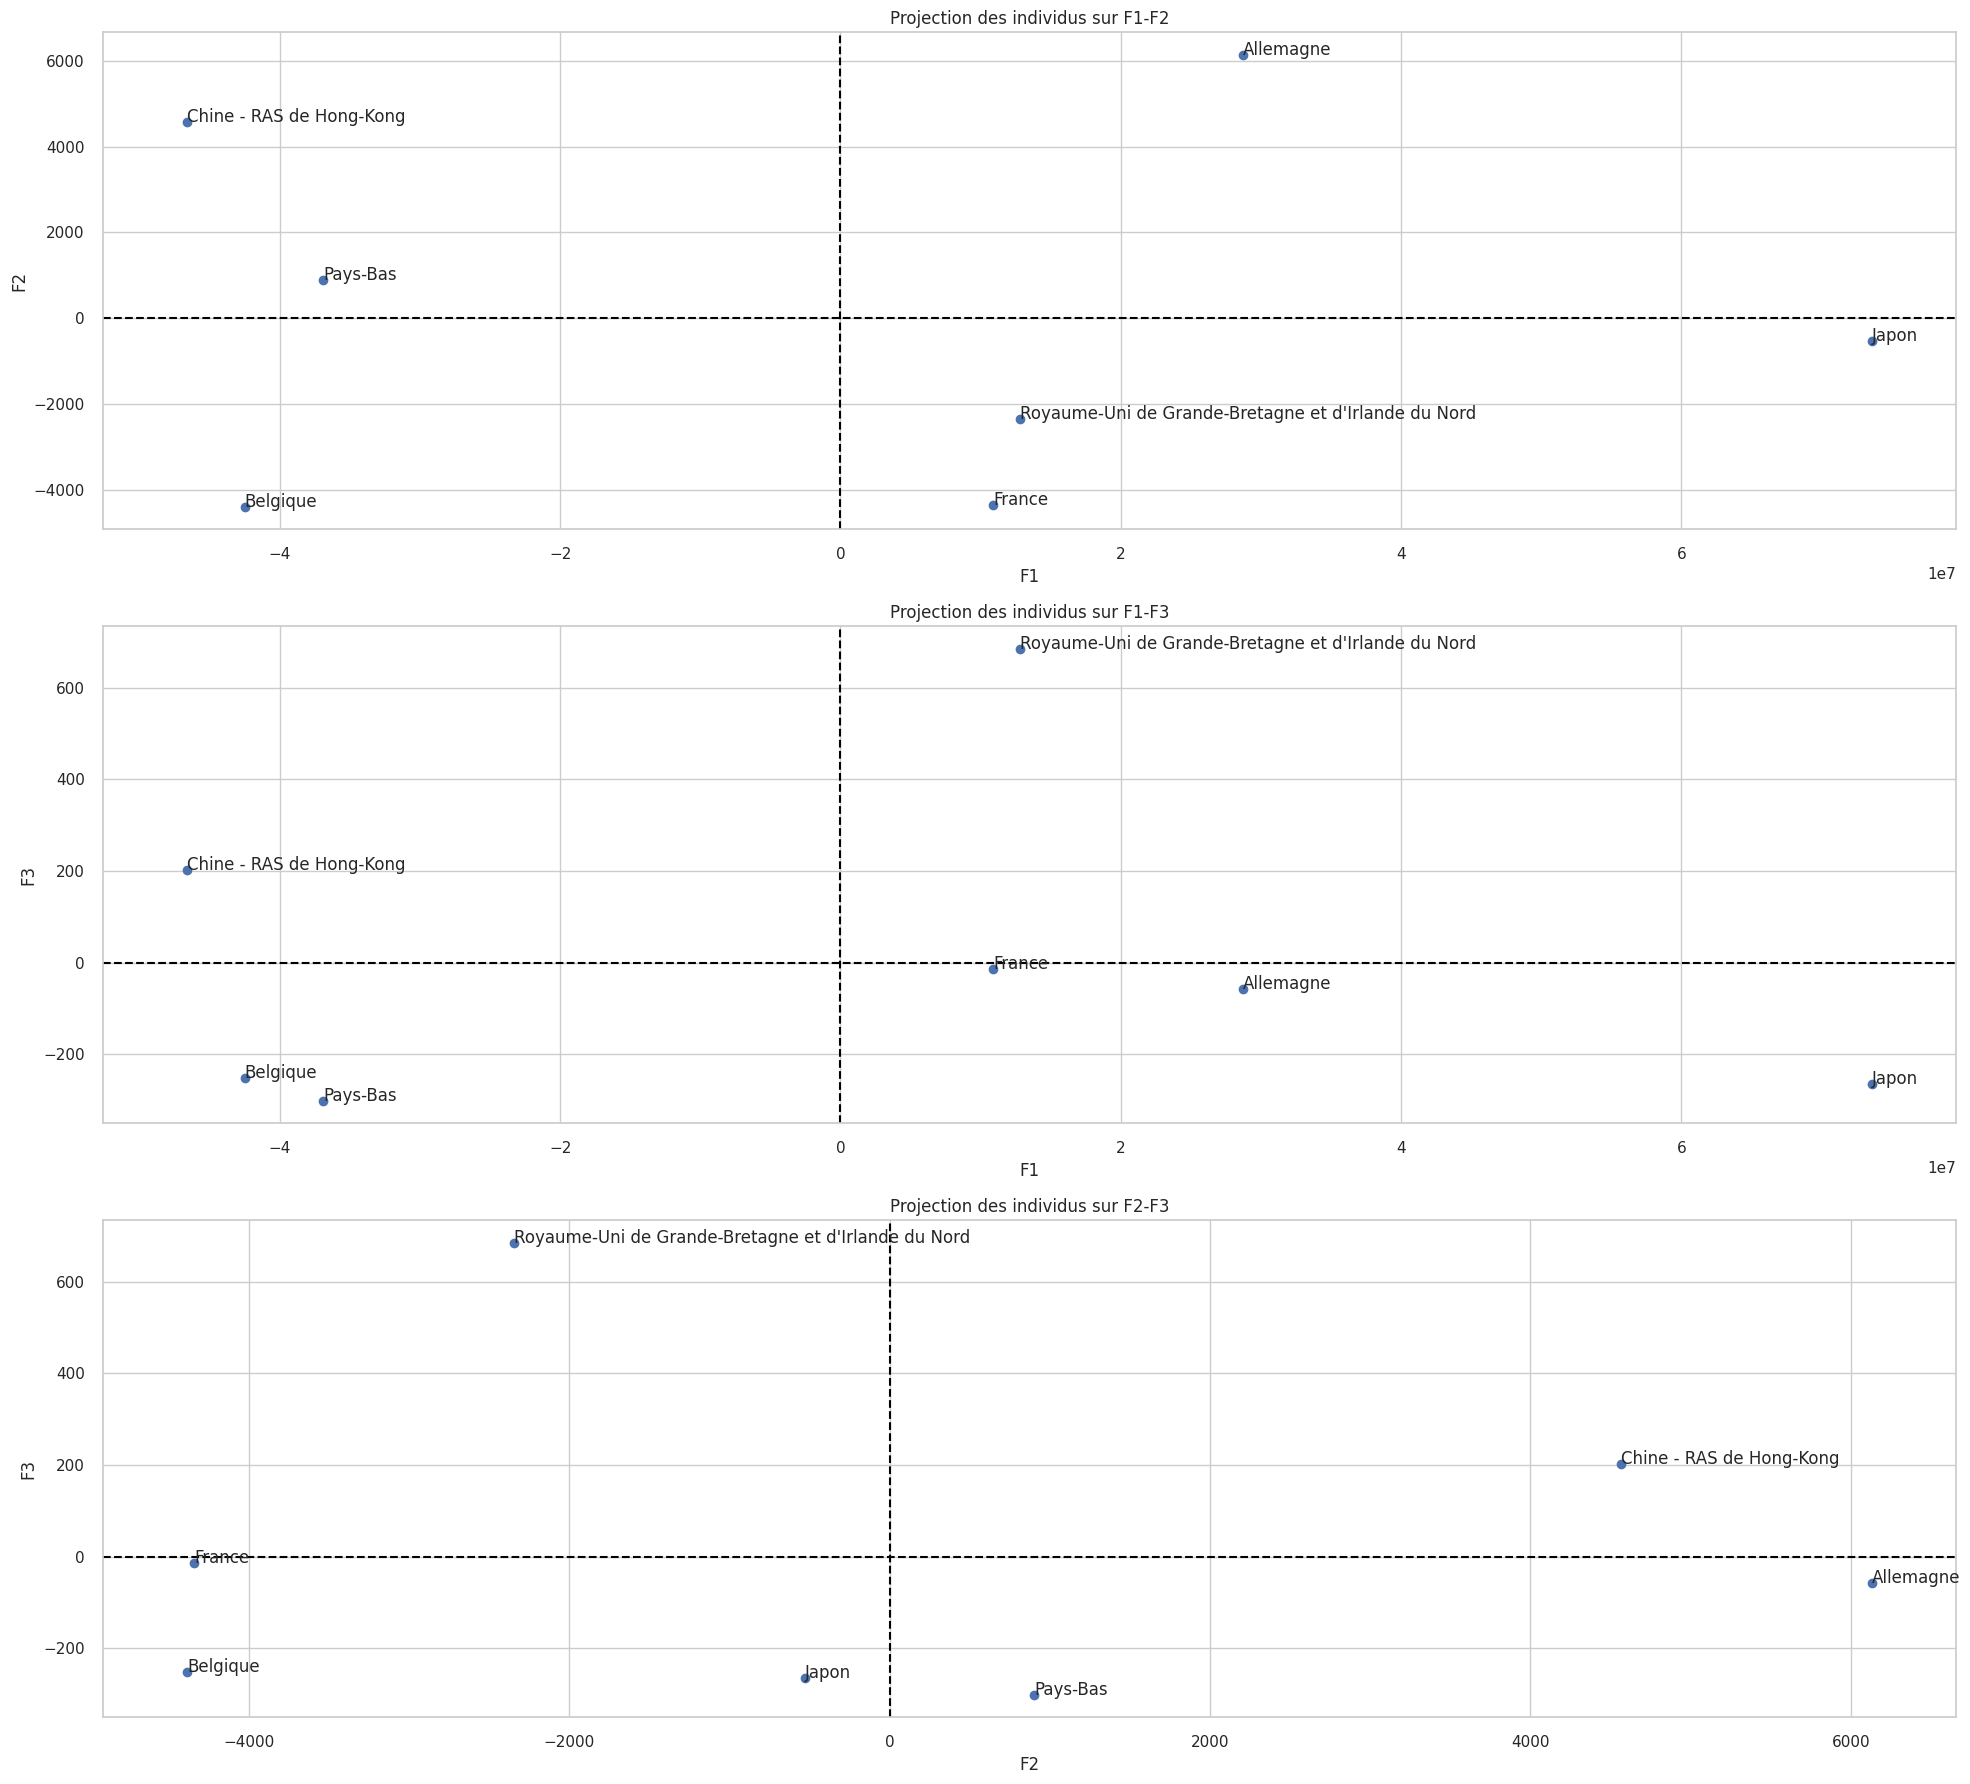

In [39]:
# Definition des noms de pays à extraire
pays_a_extraire = ['Allemagne', 'Chine - RAS de Hong-Kong', 'France',
                   'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord','Belgique','Japon','Pays-Bas']

# Recupération des données correspondantes
data_pays_selectionnes = data.loc[pays_a_extraire]

# Selection des données pour l'ACP
X = data_pays_selectionnes

# Réalisation de l'ACP
pca = PCA(n_components=3)
components = pca.fit_transform(X)

# Création d'un DataFrame pour les composantes principales
components_df = pd.DataFrame(data=components, columns=['F1', 'F2', 'F3'])

# Ajout des noms de pays au DataFrame des composantes principales
components_df['Pays'] = data_pays_selectionnes.index

# Projection des individus sur les plans factoriels F1-F2, F1-F3 et F2-F3
plt.figure(figsize=(20, 18))

# F1 F2
plt.subplot(3, 1, 1)
plt.scatter(components_df['F1'], components_df['F2'])
plt.axhline(0, color='black', linestyle='--')  # Axe y
plt.axvline(0, color='black', linestyle='--')  # Axe x
for i, txt in enumerate(components_df['Pays']):
    plt.annotate(txt, (components_df['F1'][i], components_df['F2'][i]))
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Projection des individus sur F1-F2')

# F1 F3
plt.subplot(3, 1, 2)
plt.scatter(components_df['F1'], components_df['F3'])
plt.axhline(0, color='black', linestyle='--')  # Axe y
plt.axvline(0, color='black', linestyle='--')  # Axe x
for i, txt in enumerate(components_df['Pays']):
    plt.annotate(txt, (components_df['F1'][i], components_df['F3'][i]))
plt.xlabel('F1')
plt.ylabel('F3')
plt.title('Projection des individus sur F1-F3')

# F2 F3
plt.subplot(3, 1, 3)
plt.scatter(components_df['F2'], components_df['F3'])
plt.axhline(0, color='black', linestyle='--')  # Axe y
plt.axvline(0, color='black', linestyle='--')  # Axe x
for i, txt in enumerate(components_df['Pays']):
    plt.annotate(txt, (components_df['F2'][i], components_df['F3'][i]))
plt.xlabel('F2')
plt.ylabel('F3')
plt.title('Projection des individus sur F2-F3')

# Affichage du graphique
plt.tight_layout()
plt.show()

In [40]:
import folium

# Liste des pays
countries = ['Allemagne', 'Chine - RAS de Hong-Kong', 'France',
             'Royaume-Uni de Grande-Bretagne et d\'Irlande du nord',
             'Japon', 'Pologne', 'Pays-Bas']

# Liste des coordonnées correspondantes
coordinates = {
    'Allemagne': [51.1657, 10.4515],
    'Chine - RAS de Hong-Kong': [22.3193, 114.1694],
    'France': [46.2276, 2.2137],
    'Royaume-Uni de Grande-Bretagne et d\'Irlande du nord': [55.3781, -3.4360],
    'Japon': [36.2048, 138.2529],
    'Pologne': [51.9194, 19.1451],
    'Pays-Bas': [52.1326, 5.2913]
}

# Création de la carte du monde
map = folium.Map(location=[0, 0], zoom_start=2)

# Ajout des pays sélectionnés avec un point
for country in countries:
    color = 'yellow'
    if country in ['Allemagne', 'Royaume-Uni de Grande-Bretagne et d\'Irlande du nord', 'Japon']:
        color = 'green'
    folium.CircleMarker(
        location=coordinates[country],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(map)

# Affichage de la carte
map
